<a href="https://colab.research.google.com/github/TamaVux/PdM/blob/CMAPSS_instance_ver0/CMAPSS/CMAPSS_instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#For model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# For EDA
!pip install ydata-profiling
import ydata_profiling as pdpf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=07292d73379efcbd95f8c10bae1ae237c64dd8f69edf1dafc045c8a0e6f394dc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

## Some support functions

In [3]:
# Split dataframe into X (feature) and Y (target)
def split_df_XY(df,feature_list,target_list):
  X = df[feature_list].copy()
  Y = df[target_list].copy()
  return X,Y
# Split dataframe into group value (from a column); Ex split CMAPSS contain 100 unit into 100 set of data
  # Dataset with be save as df[] , with each value in [] is the name value
def split_df_unit(df,colname):
  df_unit = {}
  df_group = df.groupby(colname)
  for name, group in df_group:
    df_unit[name] = group.copy().reset_index(drop=True)
  return df_unit

# FOLDER PATHS

In [4]:
if not os.path.exists('/content/drive'):
  try:
    from google.colab import drive
    drive.mount('/content/drive')
  except:
    print('Cant mount')
else:
  print('Mounted')

Mounted


In [5]:
DRIVE_PATHS = '/content/drive/MyDrive/ColabProjects'
PROJECT_NAME = 'PdM'
DRIVE_FOLDERS = {
    'DATASET': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset'),
    'MODEL': os.path.join(DRIVE_PATHS,PROJECT_NAME,'model'),
    'CMAPSS': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset','CMAPSS'),
    'RESULTS': os.path.join(DRIVE_PATHS,PROJECT_NAME,'results')
}

Project tag:
contain:
* Save file

In [6]:
CMAPSS_IN = {
    'SAVE_MODEL': os.path.join(DRIVE_FOLDERS['MODEL'],'CMAPSS_instance'),
    'SAVE_RESULTS': os.path.join(DRIVE_FOLDERS['RESULTS'],'CMAPSS_instance'),
}

In [7]:
for path in DRIVE_FOLDERS.values() :
    if not os.path.exists(path):
        if os.name == 'posix':
          print('create: {}'.format(path))
          !mkdir -p {path}
        if os.name == 'nt':
          print('create: {}'.format(path))
          !mkdir {path}

for path in CMAPSS_IN.values() :

    if not os.path.exists(path):
        if os.name == 'posix':
          print('create: {}'.format(path))
          !mkdir -p {path}
        if os.name == 'nt':
          print('create: {}'.format(path))
          !mkdir {path}

## Global varibles

In [8]:
GLOBALVALUE = {
    # RULMODE: choose between 'HI', 'RUL', 'MAX' -> will format the output in section 'Create HI in dataset'
    'RULMODE' : 'RUL',

}

# IMPORT DATA


## Add header add choose dataset

In [9]:
# Add header
header = ['unit_nr','cycles','setting_1','setting_2','setting_3']
ss_list = []
for i in range(1,22):
  ss = 'ss{}'.format(i)
  ss_list.append(ss)
header = header + ss_list
print(header)

['unit_nr', 'cycles', 'setting_1', 'setting_2', 'setting_3', 'ss1', 'ss2', 'ss3', 'ss4', 'ss5', 'ss6', 'ss7', 'ss8', 'ss9', 'ss10', 'ss11', 'ss12', 'ss13', 'ss14', 'ss15', 'ss16', 'ss17', 'ss18', 'ss19', 'ss20', 'ss21']


In [10]:
#Dataset list
dataset_list = glob.glob(os.path.join(DRIVE_FOLDERS['CMAPSS'],'*.txt')) #- set(glob.glob(os.path.join(DRIVE_FOLDERS['CMAPSS'],'RUL*')))
print(*dataset_list, sep='\n')

/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/readme.txt


CHOOSING DATASET

In [11]:
#Choose dataset
train_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'train_FD001.txt')
# test_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'test_FD001.txt')
# rul_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'RUL_FD001.txt')
# Pandas dataframe
df_FD001 = pd.read_csv(train_dataset,header=None,delim_whitespace=True,names=header)
# df_test = pd.read_csv(test_dataset,header=None,delim_whitespace=True,names=header)
# df_rul = pd.read_csv(rul_dataset,header=None,delim_whitespace=True,names=['rul'])

# PRE-PROCESS

## Preview Naked data

The data consist of 100 units of engines, each unit R2F therefor have each unique RUL.

In [12]:
def mine_naked_preview(df):
  print('\n'.join([
        f'---   Describe: \n{df.describe()}',
        f'---   Null value:\n{df.isnull().sum()}',
        f'---   Unique value:\n{df_FD001.nunique()}',
        ]))

In [13]:
mine_naked_preview(df_FD001)

---   Describe: 
            unit_nr        cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            ss1           ss2           ss3           ss4           ss5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605 

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

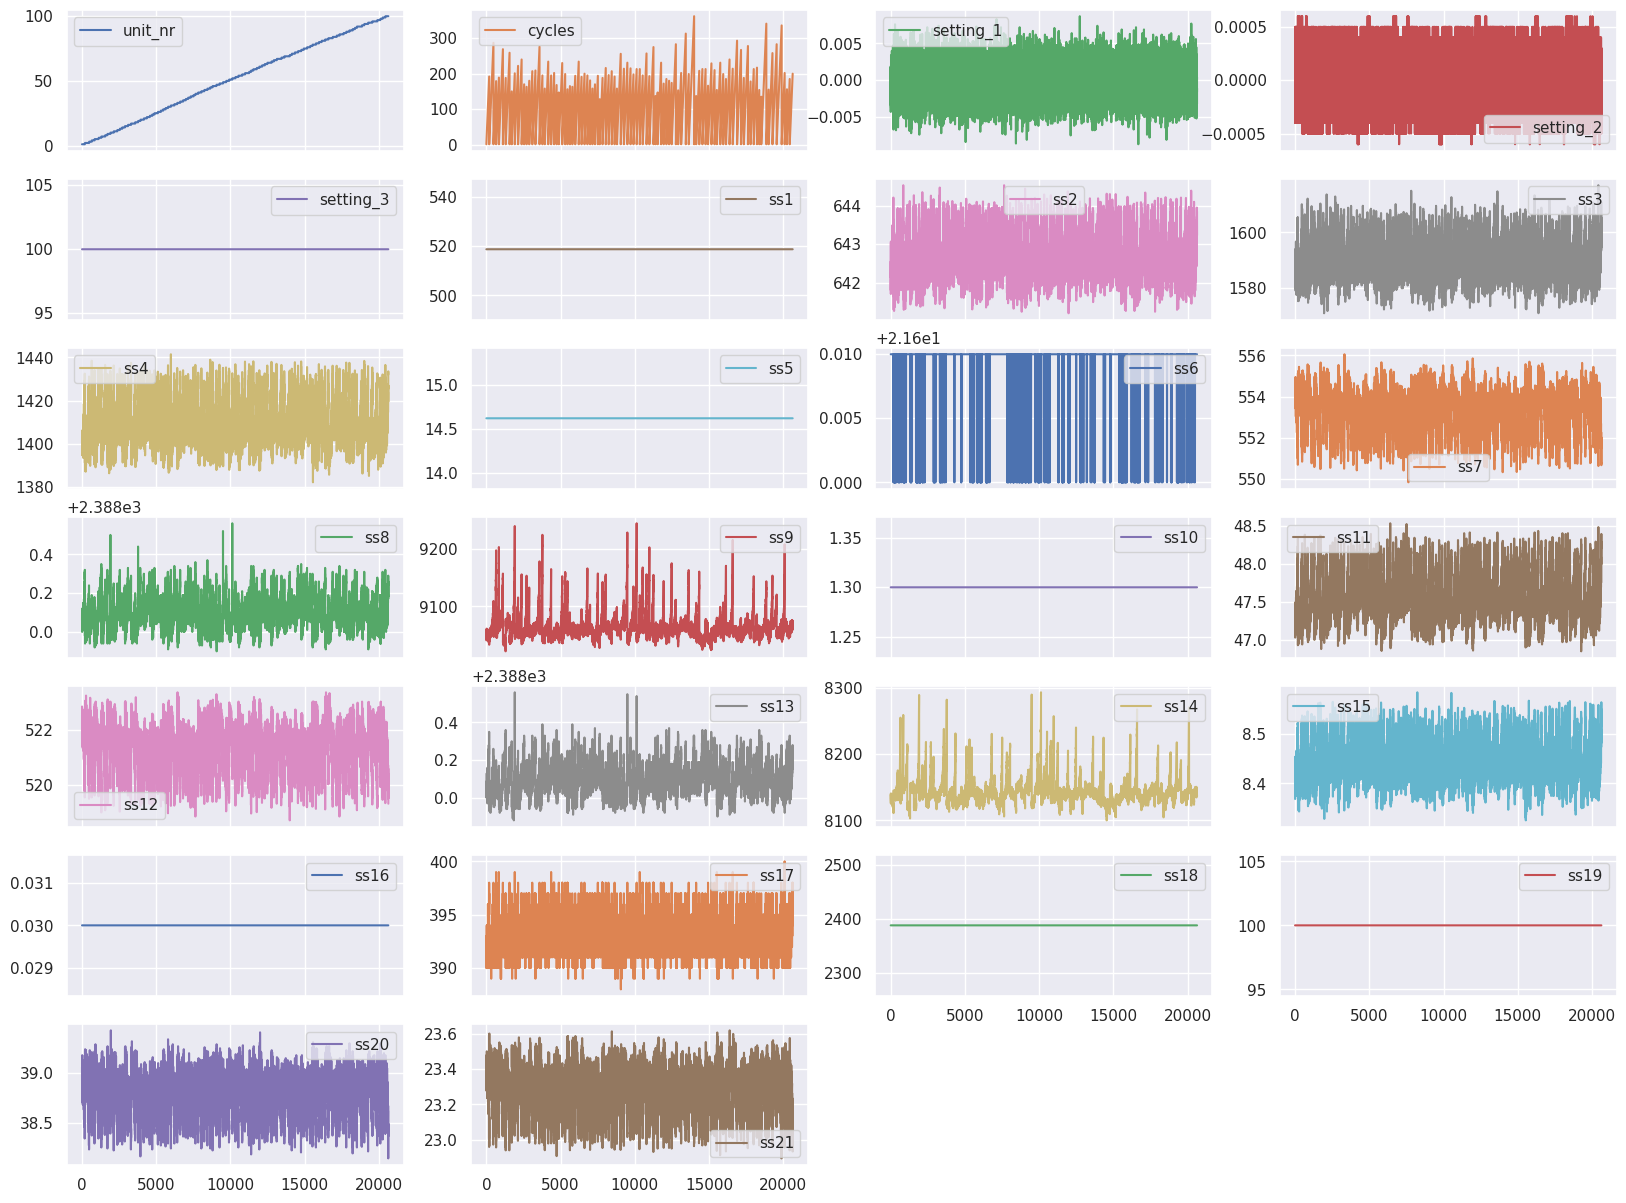

In [14]:
df_FD001.plot(subplots = True,layout=(7,4),figsize=(20,15))

Plot all values for each units, use the same cycles scales

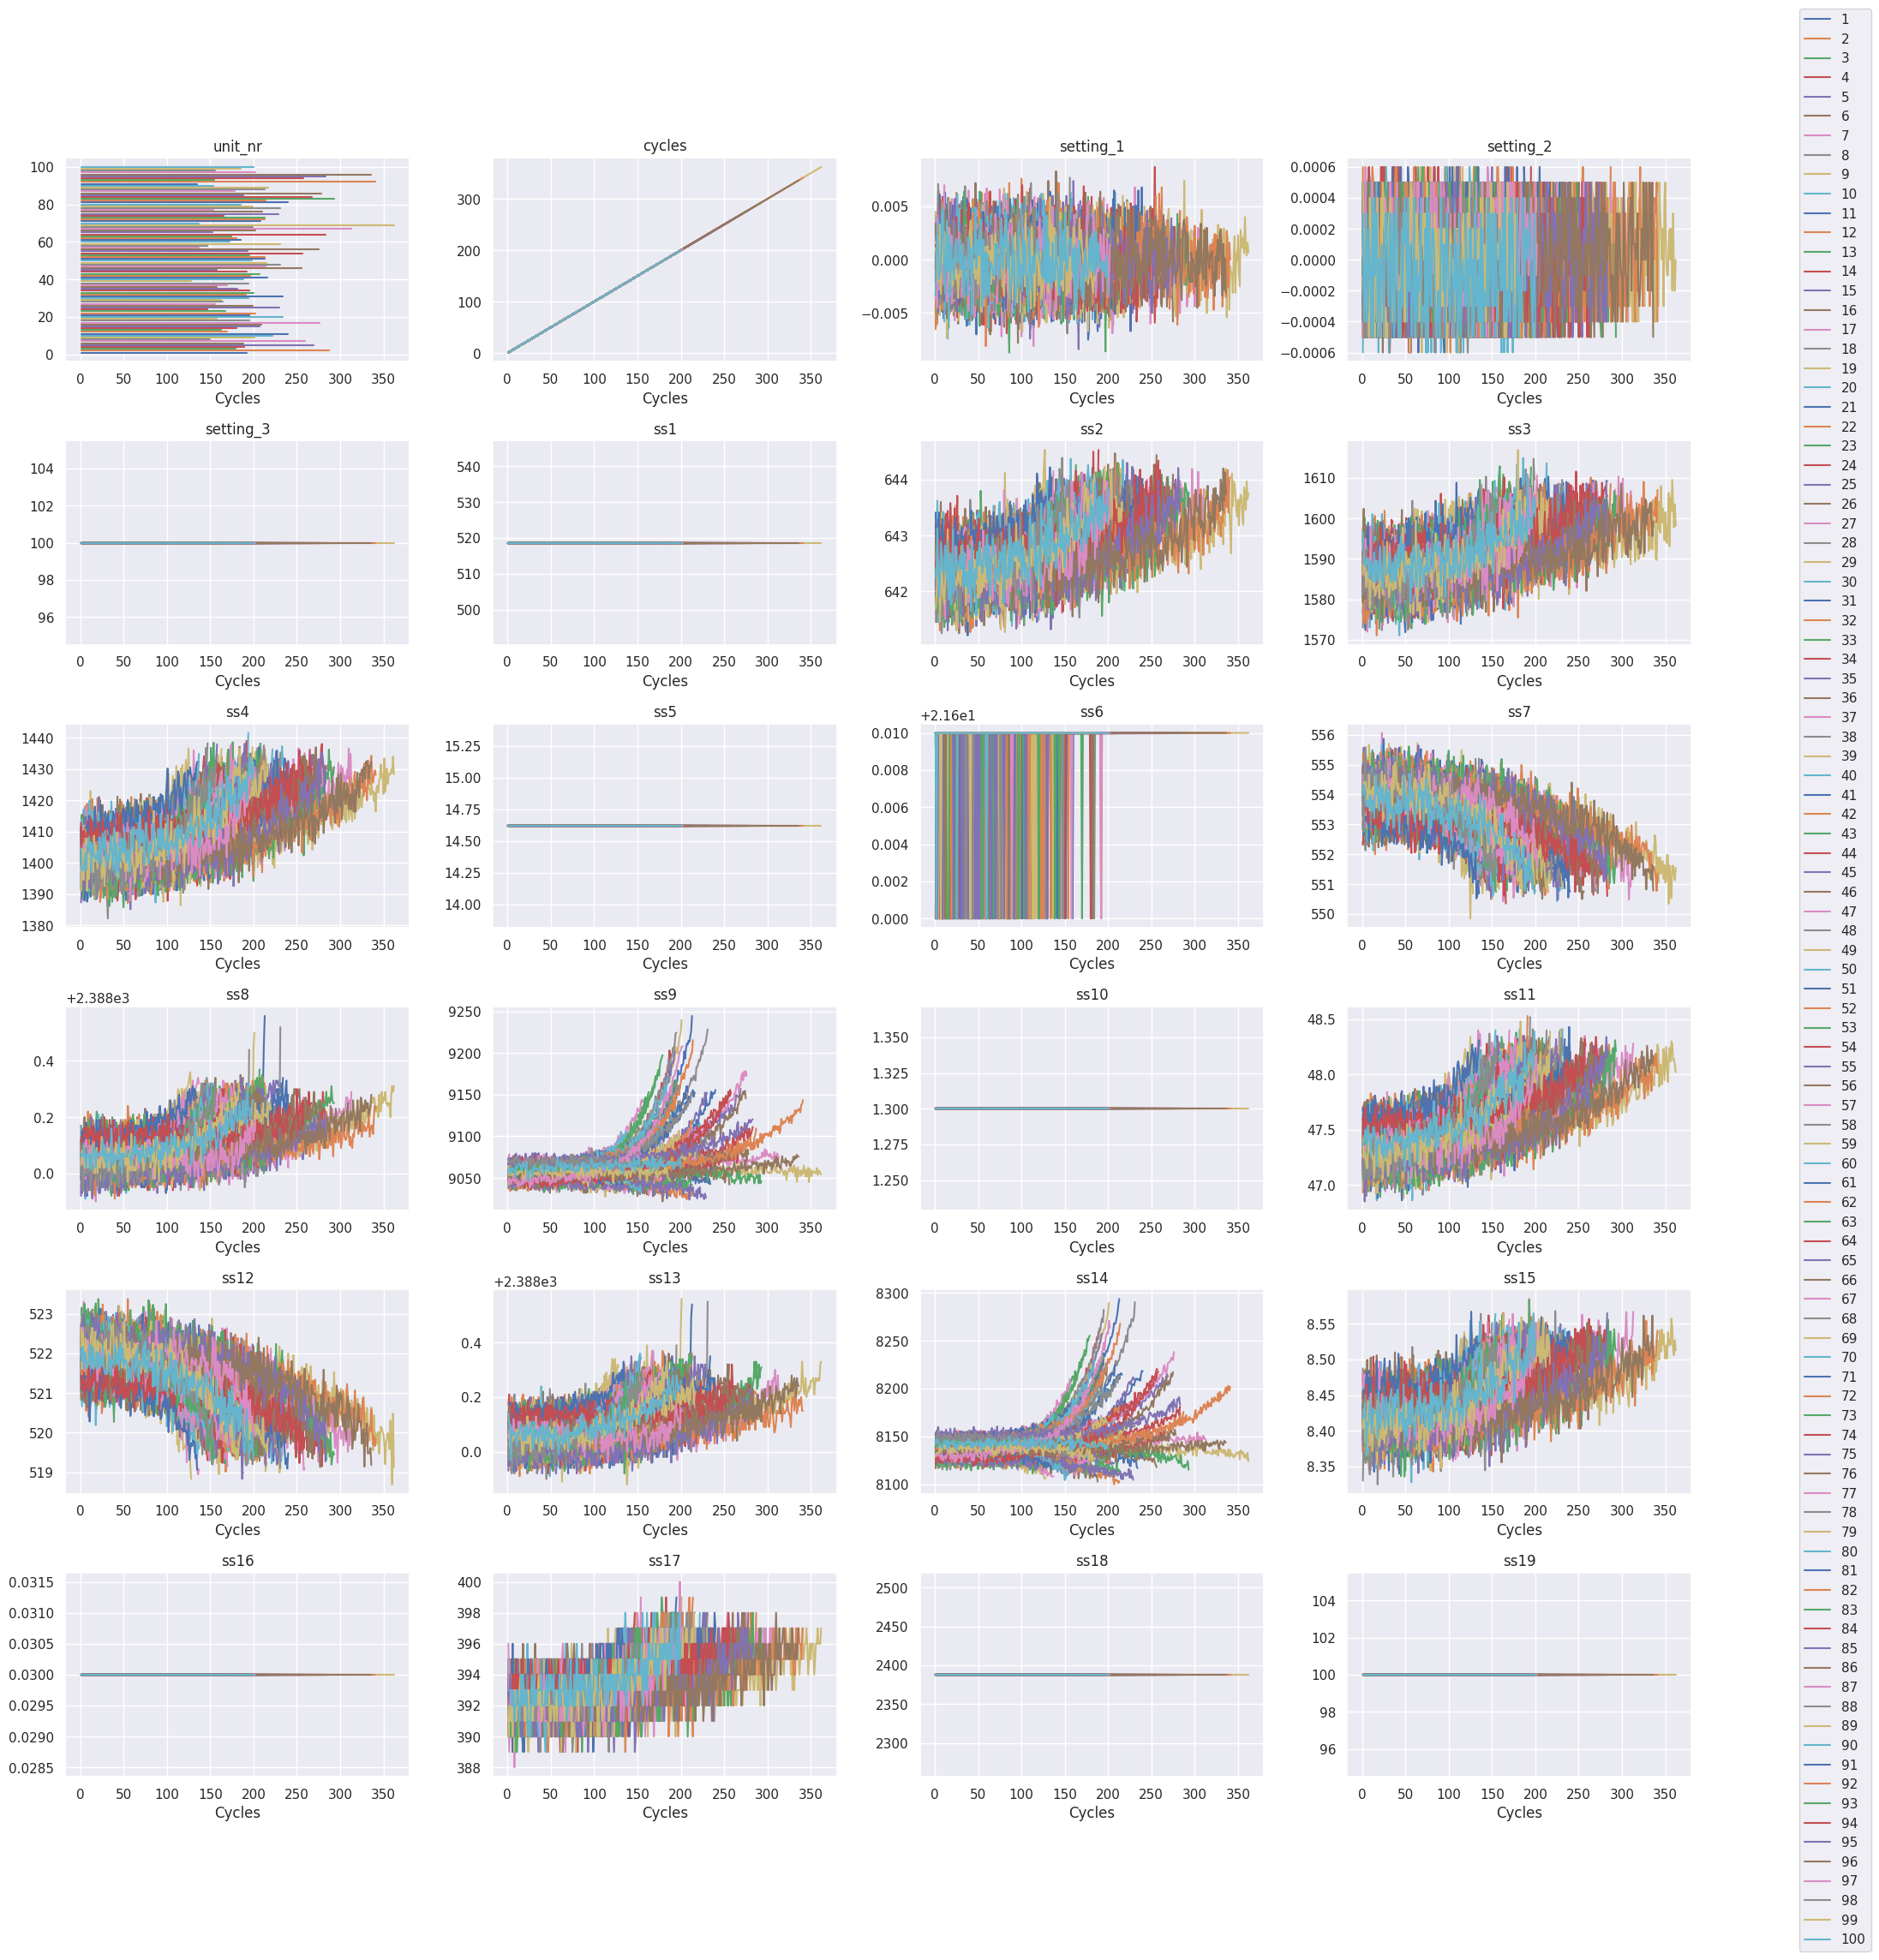

In [15]:
fig, axes = plt.subplots(6,4,figsize = (20,20))
axes = axes.flatten()
for i, (column, ax) in enumerate(zip(df_FD001.columns, axes)):
  for i in df_FD001['unit_nr'].unique():
    ax.plot('cycles',column,data=df_FD001[df_FD001['unit_nr'] == i])
    ax.set_title(column)
    ax.set_xlabel('Cycles')

# Remove any unused subplots
if len(df_FD001.columns) < len(axes):
    for ax in axes[len(df_FD001.columns):]:
        ax.remove()

# Get the handles and labels from all subplots - all subplot have the same legend
handles,labels = axes[0].get_legend_handles_labels()

# Create a common legend outside of the subplots
fig.legend(handles, df_FD001['unit_nr'].unique().tolist(), loc='center left', bbox_to_anchor=(1.05, 0.5))

fig.tight_layout()
plt.show()

In [16]:
# df_profile = pdpf.ProfileReport(df_FD001, dark_mode=True)
# df_profile

### Drop, Rename, Add ?

In [17]:
# Remove setting collunms
df_FD001 = df_FD001.drop(['setting_1','setting_2','setting_3'],axis = 1)

### Create HI in dataset !!!

Check plot histogram of RUL. From 100 engine !

How The RUL is distribute

Most engine have 200 Max cycle

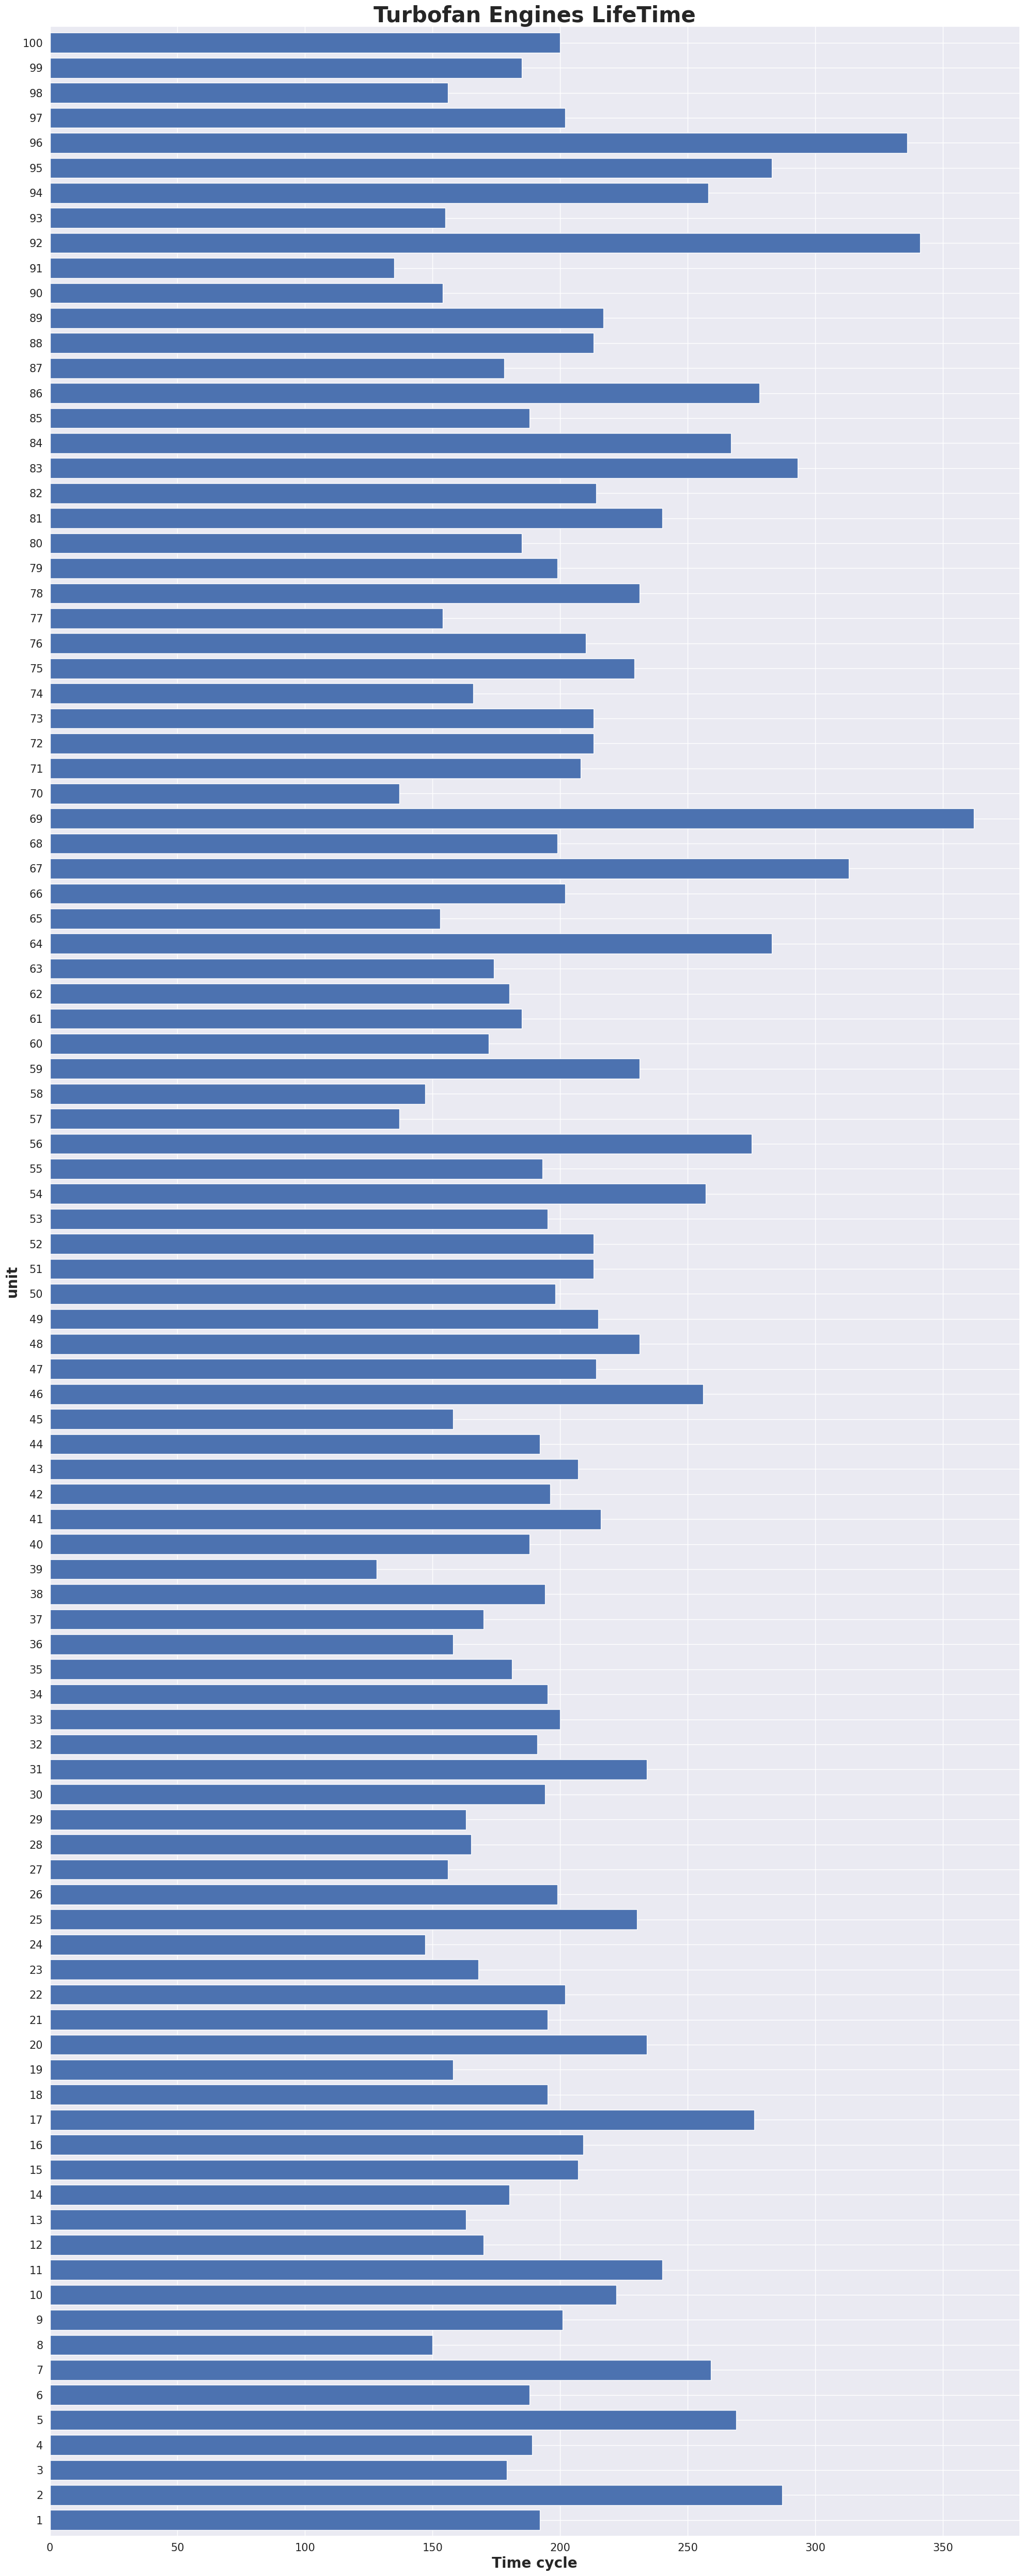

In [100]:
max_time_cycles=df_FD001[['unit_nr','cycles']].groupby('unit_nr').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 12.444444444444452, 'max time cycle')

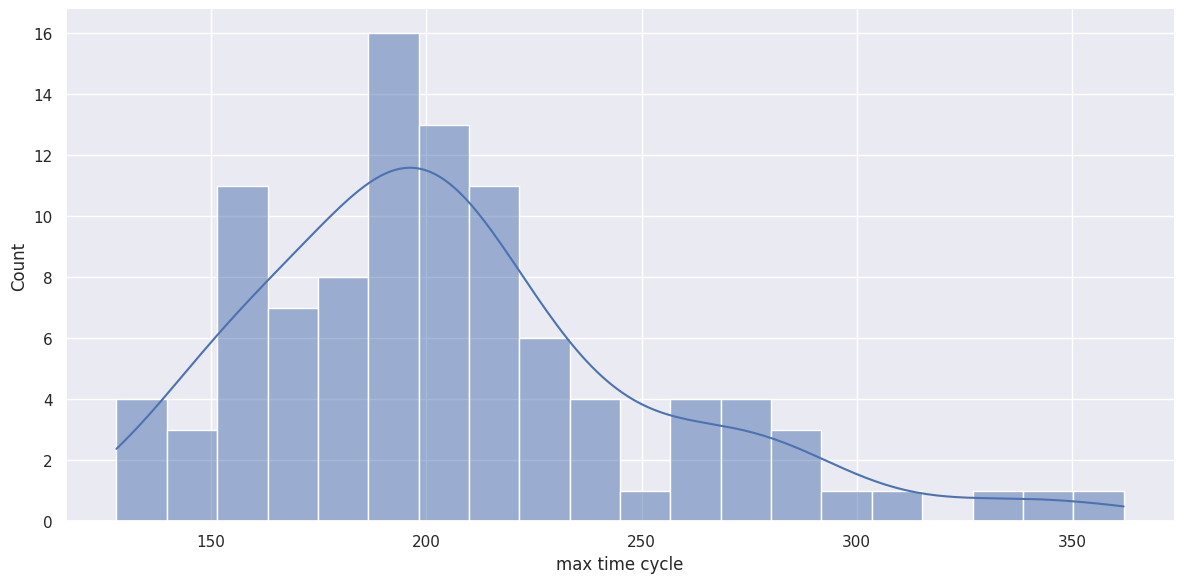

In [101]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [102]:
# Calculate RUL. Each engine have n-cycles. Calculate max cycle to get RUL of each engine (max - current)cycle
def add_rul(df,mode = 'HI'):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    MAX = grouped_by_unit["cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(MAX.to_frame(name='MAX'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["MAX"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    # Add HI
    result_frame['HI'] = (remaining_useful_life / result_frame['MAX']) * 100

    # drop MAX as it's no longer needed
    if mode == 'HI':
      result_frame = result_frame.drop(["MAX",'RUL'], axis=1)
    elif mode == 'RUL':
      result_frame = result_frame.drop(["MAX",'HI'], axis=1)
    elif mode == 'MAX':
      result_frame = result_frame.drop(["RUL",'HI'], axis=1)
    return result_frame

# The mode is define in global varible, in 'FOLDER PATHS'
df_HI = add_rul(df_FD001,mode = GLOBALVALUE['RULMODE'])
df_HI.head(15)

unit_nr  cycles     ss1     ss2      ss3      ss4    ss5    ss6     ss7  \
0         1       1  518.67  641.82  1589.70  1400.60  14.62  21.61  554.36   
1         1       2  518.67  642.15  1591.82  1403.14  14.62  21.61  553.75   
2         1       3  518.67  642.35  1587.99  1404.20  14.62  21.61  554.26   
3         1       4  518.67  642.35  1582.79  1401.87  14.62  21.61  554.45   
4         1       5  518.67  642.37  1582.85  1406.22  14.62  21.61  554.00   
5         1       6  518.67  642.10  1584.47  1398.37  14.62  21.61  554.67   
6         1       7  518.67  642.48  1592.32  1397.77  14.62  21.61  554.34   
7         1       8  518.67  642.56  1582.96  1400.97  14.62  21.61  553.85   
8         1       9  518.67  642.12  1590.98  1394.80  14.62  21.61  553.69   
9         1      10  518.67  641.71  1591.24  1400.46  14.62  21.61  553.59   
10        1      11  518.67  642.28  1581.75  1400.64  14.62  21.61  554.54   
11        1      12  518.67  642.06  1583.41  1400.15  14.62  21.61  554.52   
12        1      13  518.67  643.07  1582.19  1400.83  14.62  21.61  553.44   
13        1      14  518.67  642.35  1592.95  1399.16  14.62  21.61  554.48   
14        1      15  518.67  642.43  1583.82  1402.13  14.62  21.61  553.64   

        ss8  ...     ss13     ss14    ss15  ss16  ss17  ss18   ss19   ss20  \
0   2388.06  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06   
1   2388.04  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00   
2   2388.08  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95   
3   2388.11  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88   
4   2388.06  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90   
5   2388.02  ...  2388.03  8132.85  8.4108  0.03   391  2388  100.0  38.98   
6   2388.02  ...  2388.03  8132.32  8.3974  0.03   392  2388  100.0  39.10   
7   2388.00  ...  2388.03  8131.07  8.4076  0.03   391  2388  100.0  38.97   
8   2388.05  ...  2388.05  8125.69  8.3728  0.03   392  2388  100.0  39.05   
9   2388.05  ...  2388.06  8129.38  8.4286  0.03   393  2388  100.0  38.95   
10  2388.05  ...  2388.01  8140.58  8.4340  0.03   392  2388  100.0  38.94   
11  2388.09  ...  2388.02  8134.25  8.3938  0.03   391  2388  100.0  39.06   
12  2388.12  ...  2388.08  8128.10  8.4152  0.03   393  2388  100.0  38.93   
13  2388.09  ...  2388.00  8134.43  8.3964  0.03   393  2388  100.0  39.18   
14  2388.11  ...  2388.08  8127.56  8.4199  0.03   391  2388  100.0  38.99   

       ss21         HI  
0   23.4190  99.479167  
1   23.4236  98.958333  
2   23.3442  98.437500  
3   23.3739  97.916667  
4   23.4044  97.395833  
5   23.3669  96.875000  
6   23.3774  96.354167  
7   23.3106  95.833333  
8   23.4066  95.312500  
9   23.4694  94.791667  
10  23.4787  94.270833  
11  23.3660  93.750000  
12  23.2757  93.229167  
13  23.3826  92.708333  
14  23.3500  92.187500  

[15 rows x 24 columns]

### Optional: convert to non-linear

The above section create HI directly from RUL, which assuming the relationship betwwen HI-RUL is linear. We can change it so that it follow a non-linear degradation format. Beacause the input data `ss{}` is a non-linear value and it show a degradation from, so try to predict a non-linear to a linear form is hard (Run check model on linear HI if doubt).

=> convert it to a non-linear forms

The non-linear form used:
\begin{align}
&HI(t) = a×e^{b×t} + c\ \text{for}\ HI \in (0\%,100\%)
\end{align}


The function alternate form:
\begin{align}
& HI(t) = (HI_{begin} - c) × [\frac{HI_{end}-c}{HI_{begin}-c}]^{t/T} + c
\end{align}
with $T$ is the MAX cycles and $c \notin(0,1) $

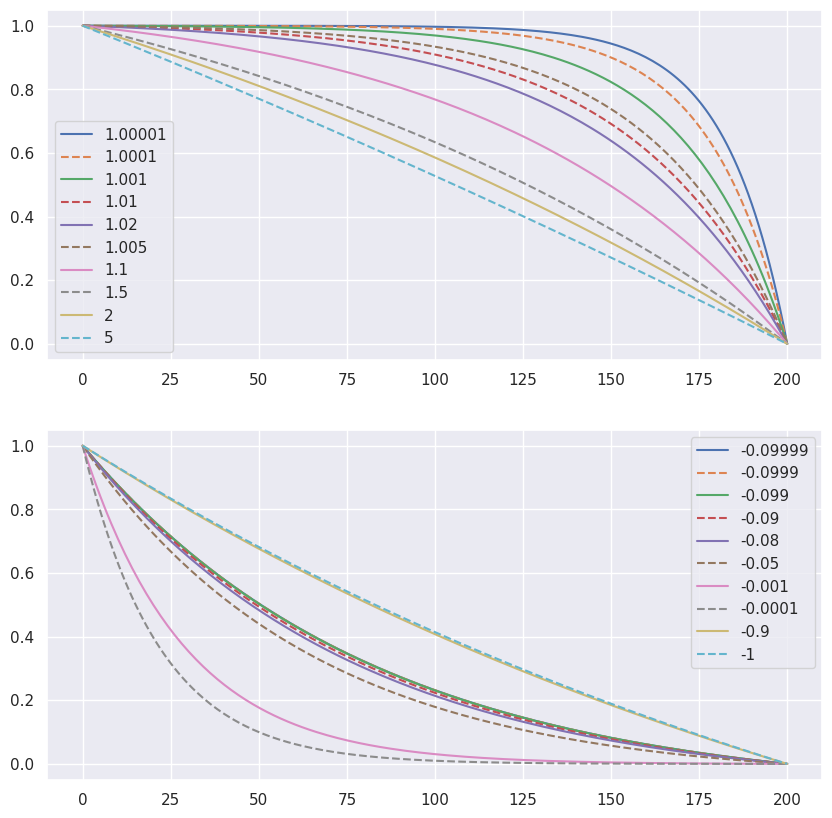

In [21]:
# Show how such function run with each c
fig ,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

T=200
t = np.linspace(0,200,200)
c_up = [1.00001, 1.0001, 1.001, 1.01, 1.02, 1.005, 1.1, 1.5, 2, 5  ]
c_down = [-0.09999, -0.09990, -0.09900, -0.09000, -0.08, -0.05, -0.001, -0.0001,-0.9, -1]
for i in range(0,10):
  linestyle = '-' if i % 2 == 0 else '--'

  HI_up = (1 - c_up[i]) * ((0-c_up[i])/(1-c_up[i]))**(t/T) + c_up[i]
  ax1.plot(t,HI_up,linestyle=linestyle, label = '{}'.format(c_up[i]))

  HI_down = (1 - c_down[i]) * ((0 - c_down[i])/(1 - c_down[i]))**(t/T) + c_down[i]

  ax2.plot(t,HI_down, linestyle=linestyle, label = '{}'.format(c_down[i]))

  ax1.legend()
  ax2.legend()

In [22]:
def add_nonL_HI(df,c = 1.02):
  # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    MAX = grouped_by_unit["cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(MAX.to_frame(name='MAX'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["MAX"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    # Add HI
    result_frame['HI'] = (1 - c) * ((0-c)/(1-c))**((result_frame["cycles"])/ result_frame["MAX"]) + c

    # Set global value to 'HI
    GLOBALVALUE['RULMODE'] = 'HI'

    # Drop MAX and RUL
    result_frame= result_frame.drop(['RUL','MAX'],axis=1)
    return result_frame

In [23]:
df_HI = add_nonL_HI(df_FD001)
df_HI

unit_nr  cycles     ss1     ss2      ss3      ss4    ss5    ss6  \
0            1       1  518.67  641.82  1589.70  1400.60  14.62  21.61   
1            1       2  518.67  642.15  1591.82  1403.14  14.62  21.61   
2            1       3  518.67  642.35  1587.99  1404.20  14.62  21.61   
3            1       4  518.67  642.35  1582.79  1401.87  14.62  21.61   
4            1       5  518.67  642.37  1582.85  1406.22  14.62  21.61   
...        ...     ...     ...     ...      ...      ...    ...    ...   
20626      100     196  518.67  643.49  1597.98  1428.63  14.62  21.61   
20627      100     197  518.67  643.54  1604.50  1433.58  14.62  21.61   
20628      100     198  518.67  643.42  1602.46  1428.18  14.62  21.61   
20629      100     199  518.67  643.23  1605.26  1426.53  14.62  21.61   
20630      100     200  518.67  643.85  1600.38  1432.14  14.62  21.61   

          ss7      ss8  ...     ss13     ss14    ss15  ss16  ss17  ss18  \
0      554.36  2388.06  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1      553.75  2388.04  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2      554.26  2388.08  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3      554.45  2388.11  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4      554.00  2388.06  ...  2388.04  8133.80  8.4294  0.03   393  2388   
...       ...      ...  ...      ...      ...     ...   ...   ...   ...   
20626  551.43  2388.19  ...  2388.26  8137.60  8.4956  0.03   397  2388   
20627  550.86  2388.23  ...  2388.22  8136.50  8.5139  0.03   395  2388   
20628  550.94  2388.24  ...  2388.24  8141.05  8.5646  0.03   398  2388   
20629  550.68  2388.25  ...  2388.23  8139.29  8.5389  0.03   395  2388   
20630  550.79  2388.26  ...  2388.26  8137.33  8.5036  0.03   396  2388   

        ss19   ss20     ss21        HI  
0      100.0  39.06  23.4190  0.999586  
1      100.0  39.00  23.4236  0.999164  
2      100.0  38.95  23.3442  0.998733  
3      100.0  38.88  23.3739  0.998293  
4      100.0  38.90  23.4044  0.997844  
...      ...    ...      ...       ...  
20626  100.0  38.49  22.9735  0.077137  
20627  100.0  38.30  23.1594  0.058417  
20628  100.0  38.44  22.9333  0.039326  
20629  100.0  38.29  23.0640  0.019856  
20630  100.0  38.37  23.0522  0.000000  

[20631 rows x 24 columns]

# FEATURE ENGINERING AND SELECTION

## Correlation


Drop the cycles columns since it now turn into HI

In [103]:
try:
  df_HI = df_HI.drop('cycles',axis=1)
except:
  print('Already drop')

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
def showheatmap(df,threshold=None):
  if threshold == None:
    # Calculate the correlation matrix
    corr_matrix = df.corr(method = 'pearson').abs()

    # Create a heatmap using seaborn
    plt.figure(figsize=(20,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    return corr_matrix
  else:
    corr_matrix = df.corr(method = 'pearson').abs()
    bool_matrix = corr_matrix.abs() >= threshold
    # Create a heatmap using seaborn
    plt.figure(figsize=(20,10))
    sns.heatmap(bool_matrix, annot=True, cmap='coolwarm')
    return bool_matrix

The dataset contain 100 units, however we will run on the whole dataset and consider all 100 units is the same !!!

Make dataset with important features

In [105]:
df_HI = df_HI.drop('unit_nr',axis=1)

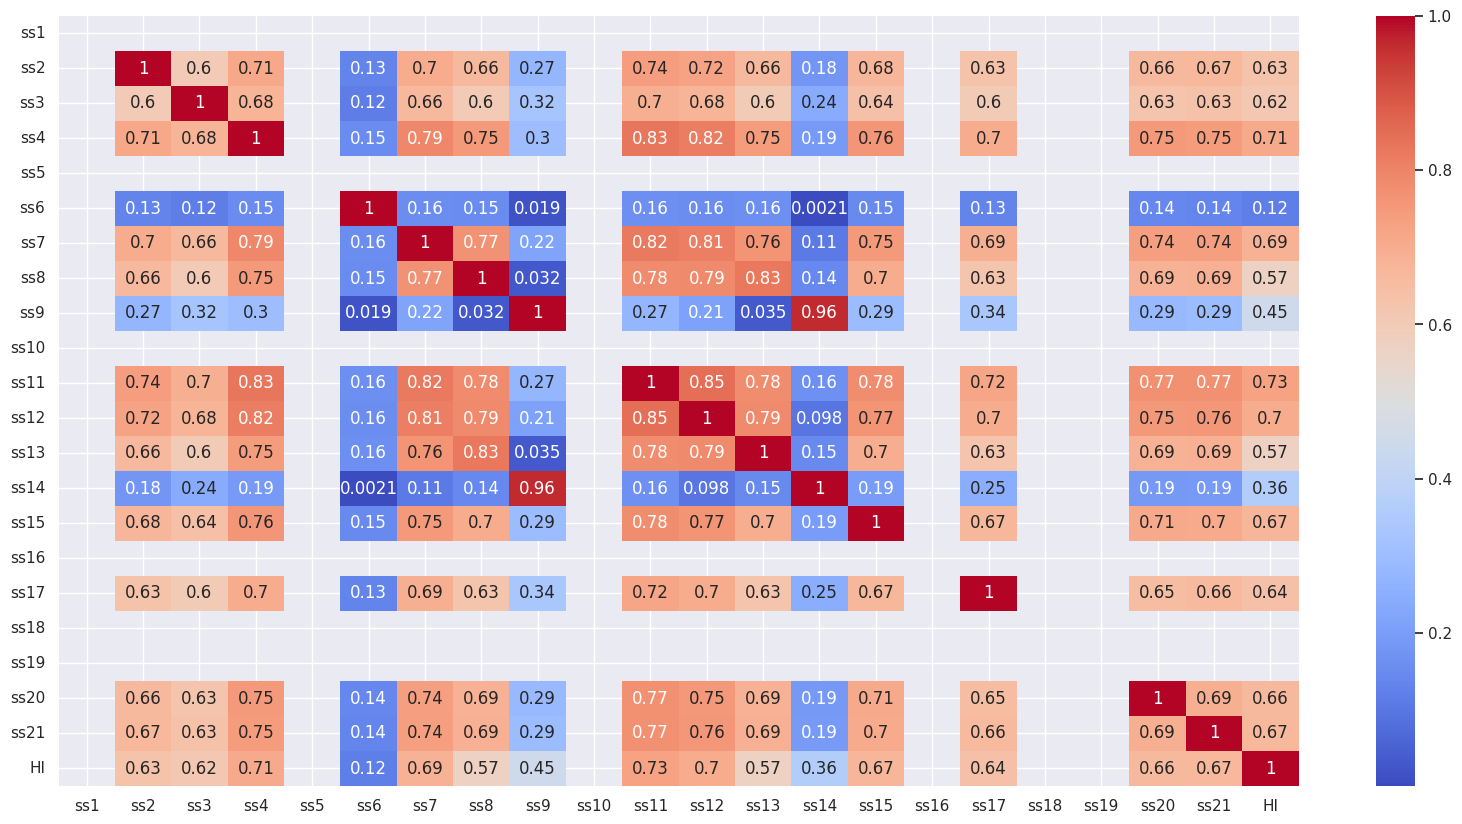

In [106]:
corr_matrix = showheatmap(df_HI)

In [107]:
def mine_corr_filter(df,target_col,threshold):
  # target column for filter
  cor_target = corr_matrix[GLOBALVALUE['RULMODE']]
  relevant_features = cor_target[cor_target > filter_threshold]
  print(relevant_features)
  # keep the features
  df_corr = df.loc[:, relevant_features.index.tolist()]
  return df_corr

In [108]:
# With threshold, we will eliminate unrelevant data
filter_threshold = 0.65
df_corr =  mine_corr_filter(df = df_HI,
                 target_col= GLOBALVALUE['RULMODE'],
                 threshold =filter_threshold )
df_corr

ss4     0.711539
ss7     0.685233
ss11    0.727496
ss12    0.701873
ss15    0.672931
ss20    0.663741
ss21    0.666816
HI      1.000000
Name: HI, dtype: float64


ss4     ss7   ss11    ss12    ss15   ss20     ss21         HI
0      1400.60  554.36  47.47  521.66  8.4195  39.06  23.4190  99.479167
1      1403.14  553.75  47.49  522.28  8.4318  39.00  23.4236  98.958333
2      1404.20  554.26  47.27  522.42  8.4178  38.95  23.3442  98.437500
3      1401.87  554.45  47.13  522.86  8.3682  38.88  23.3739  97.916667
4      1406.22  554.00  47.28  522.19  8.4294  38.90  23.4044  97.395833
...        ...     ...    ...     ...     ...    ...      ...        ...
20626  1428.63  551.43  48.07  519.49  8.4956  38.49  22.9735   2.000000
20627  1433.58  550.86  48.04  519.68  8.5139  38.30  23.1594   1.500000
20628  1428.18  550.94  48.09  520.01  8.5646  38.44  22.9333   1.000000
20629  1426.53  550.68  48.39  519.67  8.5389  38.29  23.0640   0.500000
20630  1432.14  550.79  48.20  519.30  8.5036  38.37  23.0522   0.000000

[20631 rows x 8 columns]

## Simple drop

See weird datas == drop it !!

In [109]:
df_HI

ss1     ss2      ss3      ss4    ss5    ss6     ss7      ss8  \
0      518.67  641.82  1589.70  1400.60  14.62  21.61  554.36  2388.06   
1      518.67  642.15  1591.82  1403.14  14.62  21.61  553.75  2388.04   
2      518.67  642.35  1587.99  1404.20  14.62  21.61  554.26  2388.08   
3      518.67  642.35  1582.79  1401.87  14.62  21.61  554.45  2388.11   
4      518.67  642.37  1582.85  1406.22  14.62  21.61  554.00  2388.06   
...       ...     ...      ...      ...    ...    ...     ...      ...   
20626  518.67  643.49  1597.98  1428.63  14.62  21.61  551.43  2388.19   
20627  518.67  643.54  1604.50  1433.58  14.62  21.61  550.86  2388.23   
20628  518.67  643.42  1602.46  1428.18  14.62  21.61  550.94  2388.24   
20629  518.67  643.23  1605.26  1426.53  14.62  21.61  550.68  2388.25   
20630  518.67  643.85  1600.38  1432.14  14.62  21.61  550.79  2388.26   

           ss9  ss10  ...     ss13     ss14    ss15  ss16  ss17  ss18   ss19  \
0      9046.19   1.3  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0   
1      9044.07   1.3  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0   
2      9052.94   1.3  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0   
3      9049.48   1.3  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0   
4      9055.15   1.3  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0   
...        ...   ...  ...      ...      ...     ...   ...   ...   ...    ...   
20626  9065.52   1.3  ...  2388.26  8137.60  8.4956  0.03   397  2388  100.0   
20627  9065.11   1.3  ...  2388.22  8136.50  8.5139  0.03   395  2388  100.0   
20628  9065.90   1.3  ...  2388.24  8141.05  8.5646  0.03   398  2388  100.0   
20629  9073.72   1.3  ...  2388.23  8139.29  8.5389  0.03   395  2388  100.0   
20630  9061.48   1.3  ...  2388.26  8137.33  8.5036  0.03   396  2388  100.0   

        ss20     ss21         HI  
0      39.06  23.4190  99.479167  
1      39.00  23.4236  98.958333  
2      38.95  23.3442  98.437500  
3      38.88  23.3739  97.916667  
4      38.90  23.4044  97.395833  
...      ...      ...        ...  
20626  38.49  22.9735   2.000000  
20627  38.30  23.1594   1.500000  
20628  38.44  22.9333   1.000000  
20629  38.29  23.0640   0.500000  
20630  38.37  23.0522   0.000000  

[20631 rows x 22 columns]

From above plot, we can drop: ss19, ss18, ss16, ss10, ss5, ss1, ss6

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

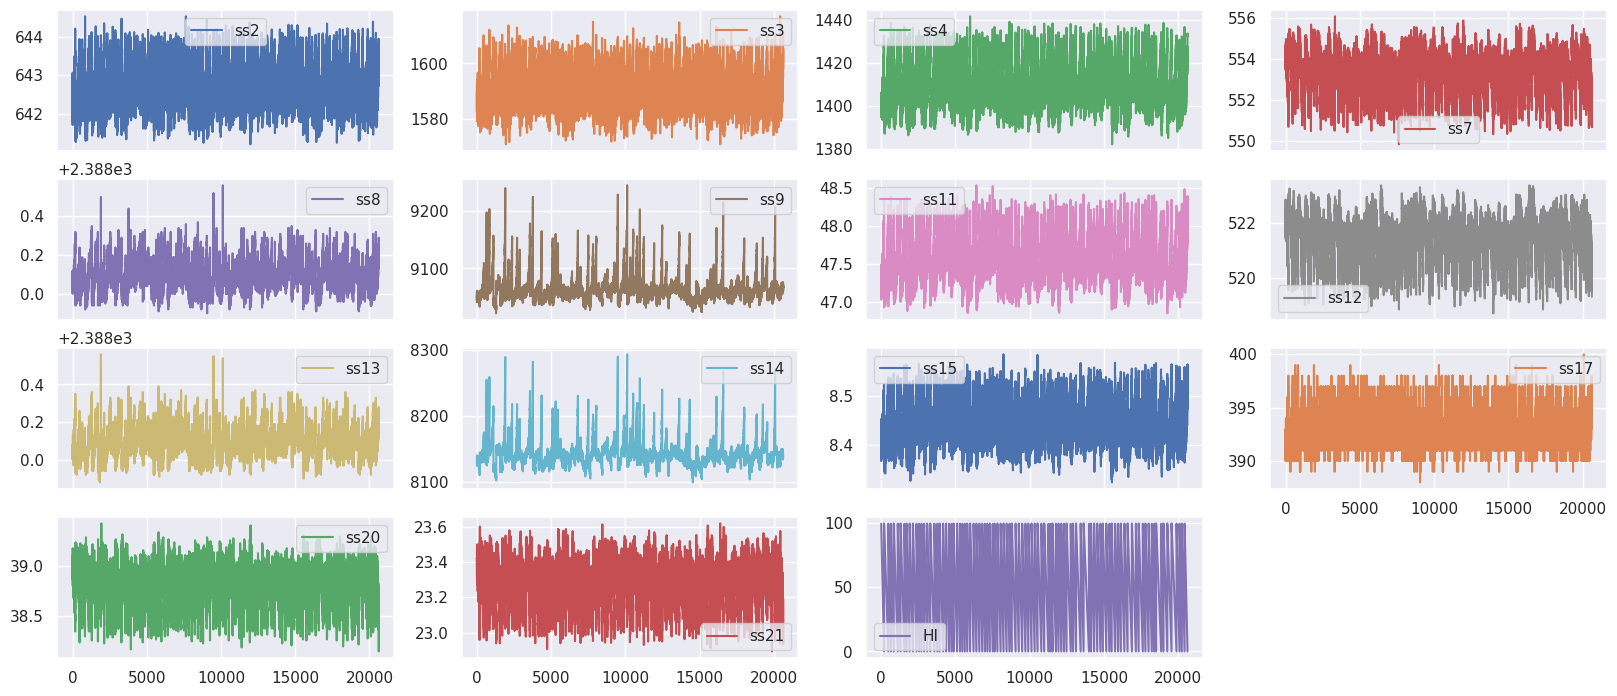

In [110]:
df_drop = df_HI.drop(['ss19', 'ss18', 'ss16', 'ss10', 'ss5', 'ss1', 'ss6'],axis=1)
df_drop.plot(subplots = True,layout=(7,4),figsize=(20,15))

## Normalize

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import pandas as pd

def min_max_scaler(df):
  scaler = MinMaxScaler()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

def standard_scaler(df):
  scaler = StandardScaler()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

def normalize(df):
  scaler = Normalizer()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

In [112]:
df_nor = min_max_scaler(df_drop)
df_nor

ss2       ss3       ss4       ss7       ss8       ss9      ss11  \
0      0.183735  0.406802  0.309757  0.726248  0.242424  0.109755  0.369048   
1      0.283133  0.453019  0.352633  0.628019  0.212121  0.100242  0.380952   
2      0.343373  0.369523  0.370527  0.710145  0.272727  0.140043  0.250000   
3      0.343373  0.256159  0.331195  0.740741  0.318182  0.124518  0.166667   
4      0.349398  0.257467  0.404625  0.668277  0.242424  0.149960  0.255952   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.686747  0.587312  0.782917  0.254428  0.439394  0.196491  0.726190   
20627  0.701807  0.729453  0.866475  0.162641  0.500000  0.194651  0.708333   
20628  0.665663  0.684979  0.775321  0.175523  0.515152  0.198196  0.738095   
20629  0.608434  0.746021  0.747468  0.133655  0.530303  0.233285  0.916667   
20630  0.795181  0.639634  0.842167  0.151369  0.545455  0.178363  0.803571   

           ss12      ss13      ss14      ss15      ss17      ss20      ss21  \
0      0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662   
1      0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014   
2      0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375   
3      0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386   
4      0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.170576  0.558824  0.194344  0.656791  0.750000  0.271318  0.109500   
20627  0.211087  0.500000  0.188668  0.727203  0.583333  0.124031  0.366197   
20628  0.281450  0.529412  0.212148  0.922278  0.833333  0.232558  0.053991   
20629  0.208955  0.514706  0.203065  0.823394  0.583333  0.116279  0.234466   
20630  0.130064  0.558824  0.192951  0.687572  0.666667  0.178295  0.218172   

             HI  
0      0.997547  
1      0.992325  
2      0.987102  
3      0.981879  
4      0.976656  
...         ...  
20626  0.020055  
20627  0.015042  
20628  0.010028  
20629  0.005014  
20630  0.000000  

[20631 rows x 15 columns]

In [113]:
df_nor.columns

Index(['ss2', 'ss3', 'ss4', 'ss7', 'ss8', 'ss9', 'ss11', 'ss12', 'ss13',
       'ss14', 'ss15', 'ss17', 'ss20', 'ss21', 'HI'],
      dtype='object')

# FORMAT IN-OUT
USE INSTANCES METHODS

Input(X): all ss and new features

Output(y): HI

In [114]:
df_nor.head(10)

ss2       ss3       ss4       ss7       ss8       ss9      ss11  \
0  0.183735  0.406802  0.309757  0.726248  0.242424  0.109755  0.369048   
1  0.283133  0.453019  0.352633  0.628019  0.212121  0.100242  0.380952   
2  0.343373  0.369523  0.370527  0.710145  0.272727  0.140043  0.250000   
3  0.343373  0.256159  0.331195  0.740741  0.318182  0.124518  0.166667   
4  0.349398  0.257467  0.404625  0.668277  0.242424  0.149960  0.255952   
5  0.268072  0.292784  0.272113  0.776167  0.181818  0.125415  0.184524   
6  0.382530  0.463920  0.261985  0.723027  0.181818  0.167818  0.303571   
7  0.406627  0.259865  0.316003  0.644122  0.151515  0.085569  0.232143   
8  0.274096  0.434707  0.211850  0.618357  0.227273  0.110967  0.261905   
9  0.150602  0.440375  0.307394  0.602254  0.227273  0.134479  0.107143   

       ss12      ss13      ss14      ss15      ss17      ss20      ss21  \
0  0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662   
1  0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014   
2  0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375   
3  0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386   
4  0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502   
5  0.637527  0.220588  0.169832  0.330512  0.250000  0.651163  0.652720   
6  0.773987  0.220588  0.167097  0.278953  0.333333  0.744186  0.667219   
7  0.805970  0.220588  0.160646  0.318199  0.250000  0.643411  0.574979   
8  0.660981  0.250000  0.132883  0.184302  0.333333  0.705426  0.707539   
9  0.660981  0.264706  0.151925  0.399000  0.416667  0.627907  0.794256   

         HI  
0  0.997547  
1  0.992325  
2  0.987102  
3  0.981879  
4  0.976656  
5  0.971434  
6  0.966211  
7  0.960988  
8  0.955765  
9  0.950542

## Train test split

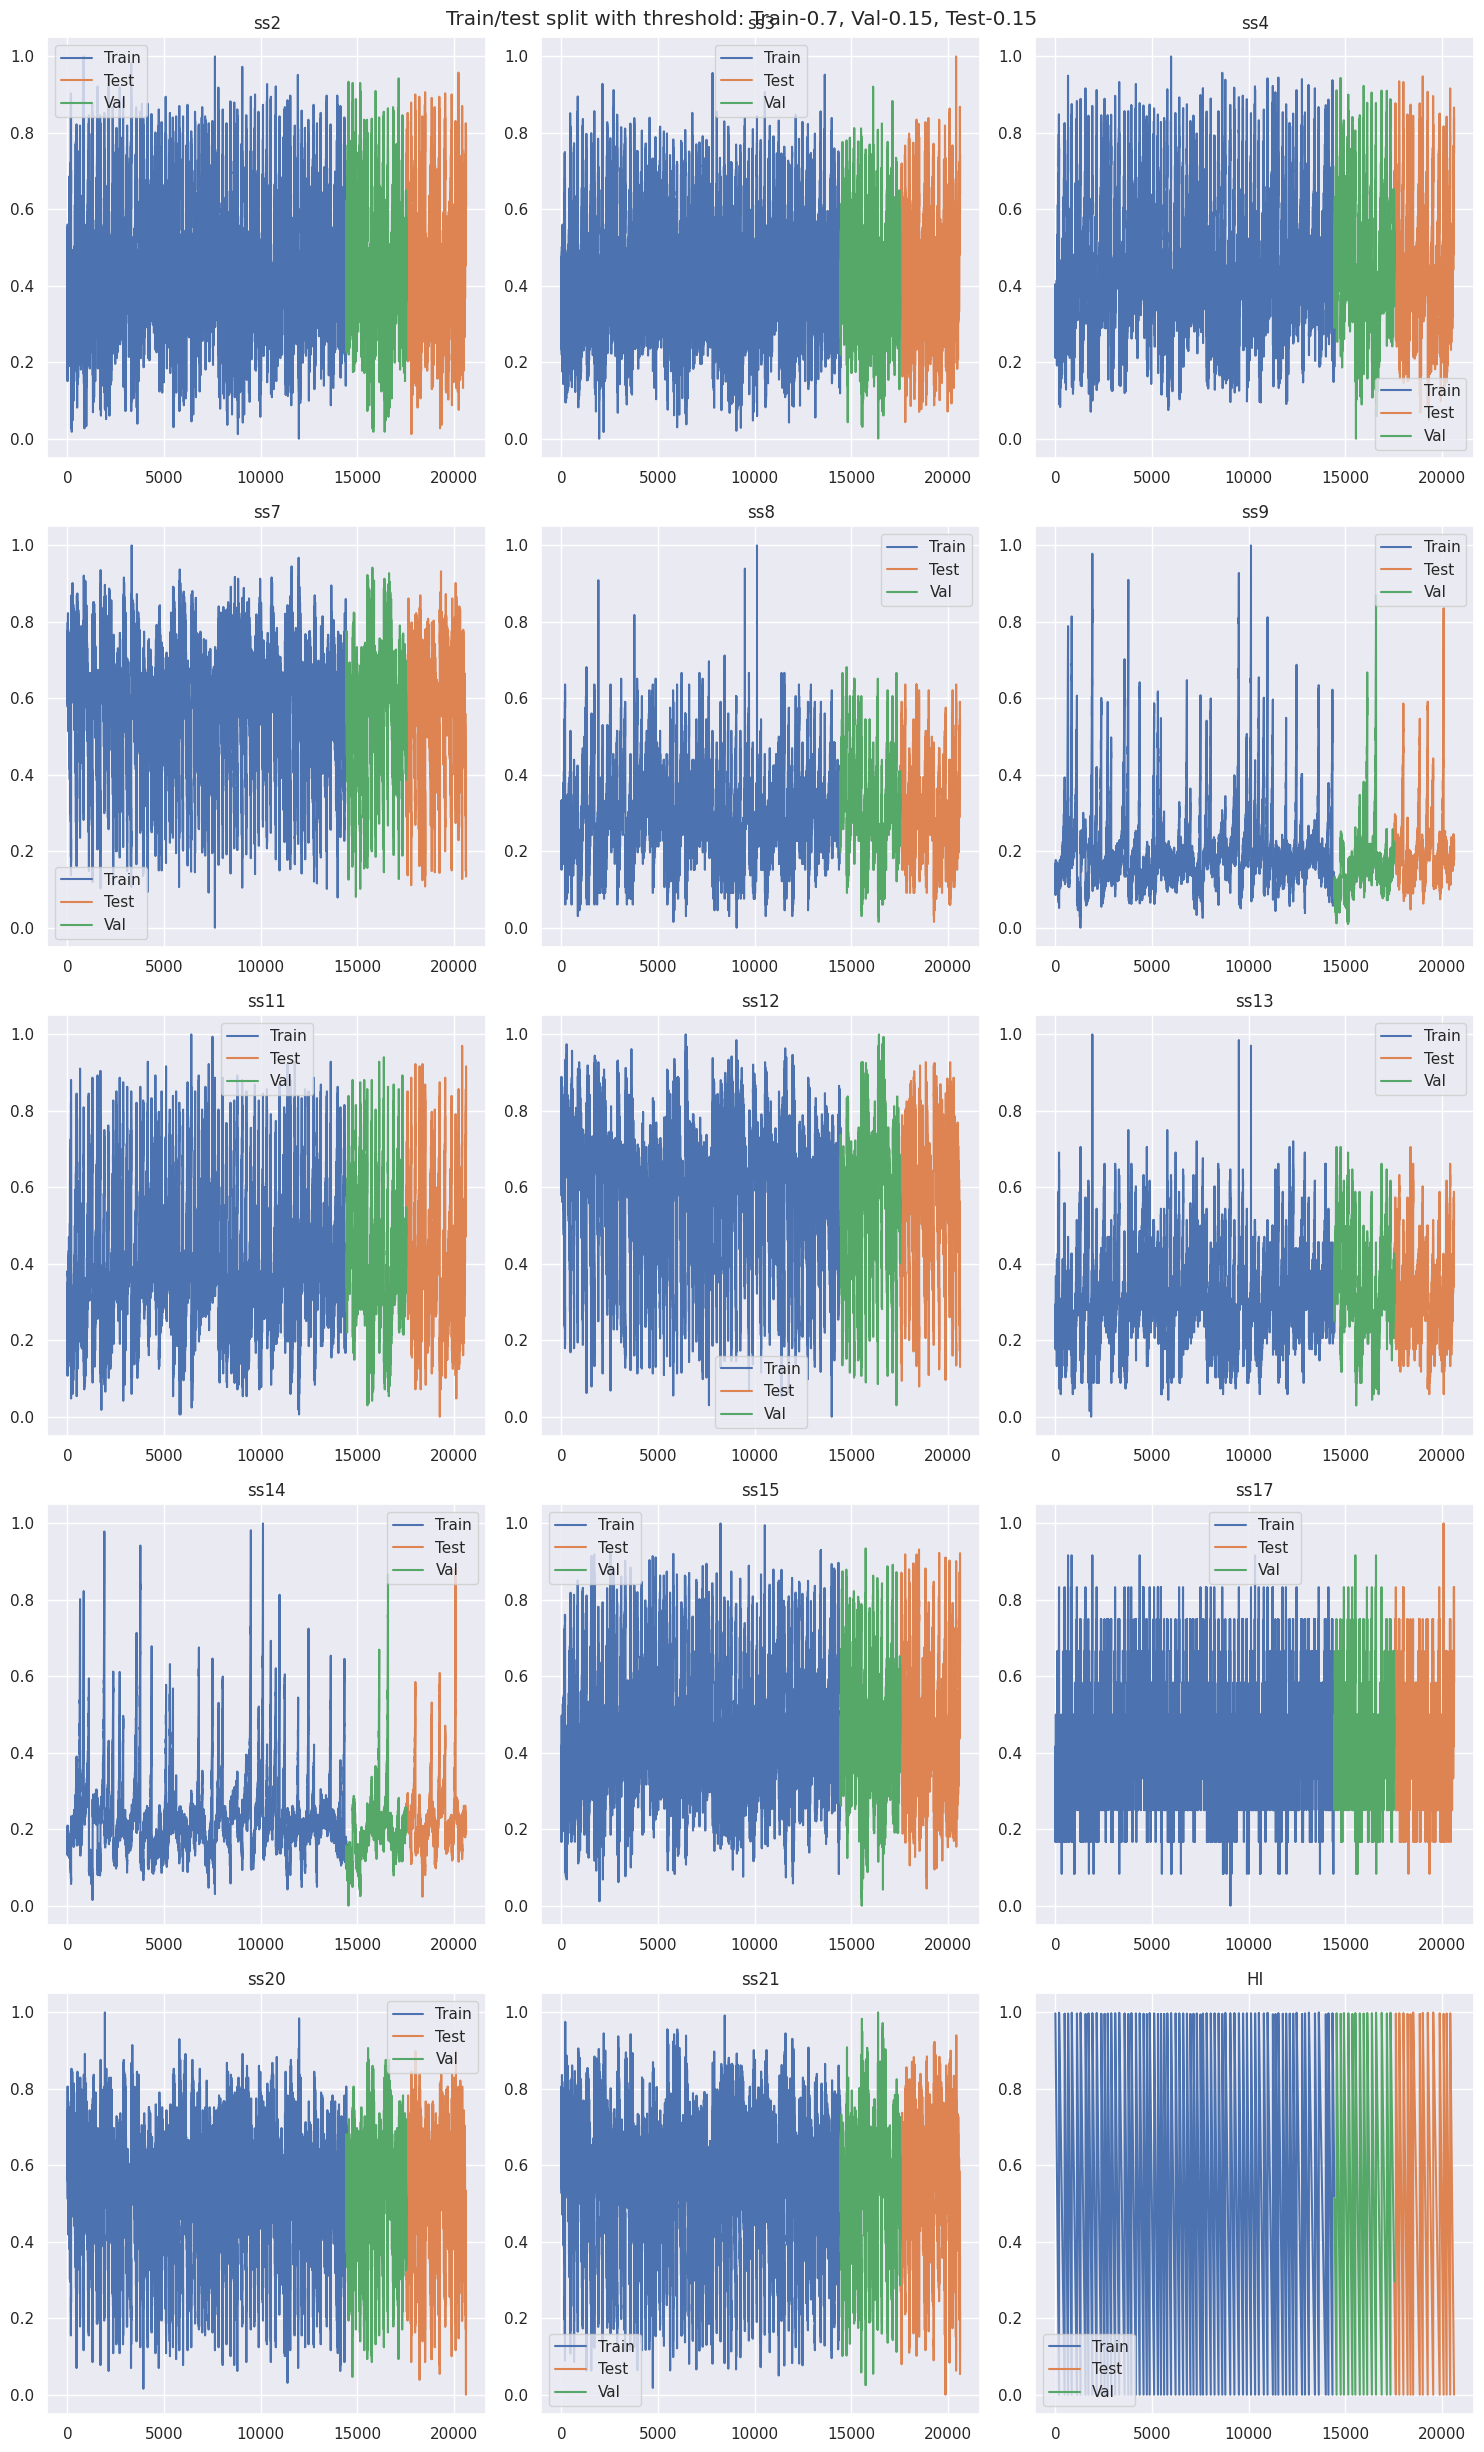

((14441, 15), (3095, 15), (3095, 15))

In [115]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_test_val_split(df, train_size=0.7, val_size=0.15, test_size=0.15):
    train_val, test = train_test_split(df, test_size=test_size, shuffle=False)
    train, val = train_test_split(train_val, test_size=val_size / (train_size + val_size), shuffle=False)

    num_cols = df.shape[1]  # Number of columns in the dataset

    if num_cols == 1:  # Univariate data
        plt.figure(figsize=(10, 5))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(val, label='Val')
        plt.title('Train/test split with threshold: Train-{}, Val-{}, Test-{}'.format(train_size, val_size, test_size))
        plt.legend()
        plt.show()
    else:  # Multivariate data
        num_rows = (num_cols + 2) // 3  # Calculate the number of subplot rows
        fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
        fig.suptitle('Train/test split with threshold: Train-{}, Val-{}, Test-{}'.format(train_size, val_size, test_size))

        for i, columns in enumerate(df.columns):
            row = i // 3
            col = i % 3
            axes[row, col].plot(train.iloc[:, i], label='Train')
            axes[row, col].plot(test.iloc[:, i], label='Test')
            axes[row, col].plot(val.iloc[:, i], label='Val')
            axes[row, col].set_title(df.columns[i])
            axes[row, col].legend()

        # Remove unused subplots
        if num_cols % 3 != 0:
            for j in range(num_cols % 3, 3):
                fig.delaxes(axes[num_rows - 1, j])

        plt.tight_layout()
        plt.show()

    return train, val, test

train, val, test = train_test_val_split(df_nor)
train.shape,val.shape,test.shape

Split all the dataset into X,y

In [116]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]

X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((14441, 14), (14441,), (3095, 14), (3095,), (3095, 14), (3095,))

In [117]:
y_train

0        0.997547
1        0.992325
2        0.987102
3        0.981879
4        0.976656
           ...   
14436    0.536694
14437    0.531986
14438    0.527278
14439    0.522570
14440    0.517862
Name: HI, Length: 14441, dtype: float64

# MODELS

## Performance matrix and funtions

### Create score dataframe

In [118]:
### Create the data frame for the evaluation matrix
# Same matrix can use for many regression model
df_eva = pd.DataFrame(columns=[
    'Model_name','E_mean','E_min','E_max', 'MSE', 'MAE','RMSE','R2_score','Run_time(s)'
])
df_eva

Empty DataFrame
Columns: [Model_name, E_mean, E_min, E_max, MSE, MAE, RMSE, R2_score, Run_time(s)]
Index: []

### Test set evaluate
Class 'test_evaluate' for evaluating the dataset, and save the score on the dataframe

Define as: `test_evaluate(model,X_test,y_test)`

Use attribute:
* `random_plot(range)` : given plot of random range value or all (if `range` =0)
* `record_test(df,_eva,model_str_name)`:

In [119]:
### For Test set
import time
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Class get predction on test set and save on a dataframe 'result' for further evaluation
class test_evaluate():
  def __init__(self,model,X_test,y_test):
    self.model = model
    self.X_test = X_test
    self.y_test = y_test
    # Get reuslt: df col: {'Predictions', 'Actuals', 'mae', 'mse'}
    self.result,self.run_time = self.get_prediction()
    print(self.result)

  ### Get prediction of the dataset and return the dataset
  def get_prediction(self):
    # Run prediction and get run time in second
    start_time = time.time()
    predict = self.model.predict(self.X_test).flatten()
    end_time = time.time()
    run_time = end_time - start_time
    # Actual value
    actual = tf.squeeze(self.y_test)
    # save in df
    result = pd.DataFrame(data={'Predictions': np.array(predict)})
    result['Actuals'] = pd.Series(actual)
    result['Error'] = np.abs(predict-actual)

    print(np.mean(result['Error']))
    return result, run_time

  def record_test(self,df,model_name):
    # get values
    predictions = tf.convert_to_tensor(self.result['Predictions'])
    actual_values = tf.convert_to_tensor(self.result['Actuals'])

    # Calculate MAE and MSE
    mse = tf.keras.losses.MSE(actual_values, predictions)
    mae = tf.keras.losses.MAE(actual_values, predictions)


    ##     'Model_name','E_mean','E_min','E_max', 'MSE', 'MAE','RMSE','R2_score','Run_time(s)'
    add_on = {
        'Model_name':[model_name],
        'E_mean':[np.mean(self.result['Error'])]  ,
        'E_min':[min(self.result['Error'])] ,
        'E_max':[max(self.result['Error'])] ,
        'MSE':[np.mean(mse.numpy())]  ,
        'MAE':[np.mean(mae.numpy())]  ,
        'RMSE':[np.sqrt(np.mean(mse.numpy()))] ,
        'R2_score': [r2_score(actual_values,predictions)],
        'Run_time(s)':[self.run_time]}

    if model_name in df['Model_name'].values:
        # Remove the previous row for the same model
        df = df[df['Model_name'] != model_name]

    df_add = pd.DataFrame(add_on)
    df_new = pd.concat([df,df_add], ignore_index = True)
    df.reset_index()
    return df_new

  ### Plot out random range of the set or plot all value (if given 0) ###
  def random_plot(self,range):
    if range != 0:
      if range > (len(self.result)):
        print('ERROR: The given range > the size of the set')
        return None

      # Random
      start_index = random.randint(0, len(self.result) - range)
      end_index = start_index + range

      plt.plot(self.result['Predictions'][start_index:end_index], label='predict')
      plt.plot(self.result['Actuals'][start_index:end_index], label='actual')
      plt.xlabel('Time')
      plt.ylabel('Value')
    else:
      # All
      plt.plot(self.result['Predictions'], label='predict')
      plt.plot(self.result['Actuals'], label='actual')
      plt.xlabel('Time')
      plt.ylabel('Value')

    plt.legend()

### Training evaluate
Class 'training_error' show error during train for trainset and validate set.

Use function:
* `random_plot(range)`:given plot of random range value or all (if `range` =0)
* `training_error()` : Return the plot of error during training process

In [120]:
import random
# Plot error in training process
# Arg:
#   history: model history when train
#   model: model key
#   X_train, y_train, X_val, y_val : Datasets

class training_error:
  def __init__(self, history, model, X_train, y_train, X_val, y_val):
    self.history = history
    self.X_train = X_train
    self.y_train = y_train
    self.X_val = X_val
    self.y_val = y_val
    self.model = model

    self.result_train = self.get_prediction(self.model,self.X_train,self.y_train)
    self.result_val = self.get_prediction(self.model,self.X_val,self.y_val)

  ### Plot error of train and val set in epochs
  def training_error(self):
    # Plot error of Training and val
    train_loss = self.history.history['loss']
    val_loss = self.history.history['val_loss']

    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Error Process During Training')
    plt.legend()
    plt.show()

  ### Get prediction and return the dataframe contain: 'Prediction' and 'Actual'
  def get_prediction(self,model,X,y):
    predict = self.model.predict(X).flatten()
    actual = tf.squeeze(y)

    results = pd.DataFrame(data={'Predictions': np.array(predict)})
    results['Actuals'] = pd.Series(actual)
    return results

  ### Plot for train and val set
  ### The functions have 2 mode!
    # range == 0 : the plot will show all the value in the train and val set
    # range != 0: the plot will show the random of the given range values, if the given range > the whole dataset is will error
      # note that the random in both train and val is different !!
  def random_plot(self,range):
    fig, ax = plt.subplots(1,2,figsize = (15,5))

    if range != 0:
      if range > (len(self.result_train)):
        print('ERROR: The given range > the size of the set')
        return None

      # Random part for train
      start_index = random.randint(0, len(self.result_train) - range)
      end_index = start_index + range

      ax[0].plot(self.result_train['Predictions'][start_index:end_index], label='predict')
      ax[0].plot(self.result_train['Actuals'][start_index:end_index], label='actual')
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Value')
      # Random part for val
      start_index = random.randint(0, len(self.result_val) - range)
      end_index = start_index + range

      ax[1].plot(self.result_val['Predictions'][start_index:end_index], label='predict')
      ax[1].plot(self.result_val['Actuals'][start_index:end_index], label='actual')
      ax[1].set_ylabel('Value')
      ax[1].set_xlabel('Time')
      plt.legend()
    else:
      # All for train
      ax[0].plot(self.result_train['Predictions'], label='predict')
      ax[0].plot(self.result_train['Actuals'], label='actual')
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Value')
      # All for val
      ax[1].plot(self.result_val['Predictions'], label='predict')
      ax[1].plot(self.result_val['Actuals'], label='actual')
      ax[1].set_ylabel('Value')
      ax[1].set_xlabel('Time')
      plt.legend()

In [121]:
import matplotlib.pyplot as plt
def plot_data_predict(data,prediction):
  fig,ax = plt.subplots(figsize=(10,8))
  ax.plot(data, label='Data', color='blue')
  ax.plot(prediction, label='Predict',color='red')
  ax.set_ylabel('Value')
  ax.set_xlabel('TIME')
  ax.set_title('DATA - PREDICTION')
  plt.legend()

### Save model funtions
The model save will have the time save format: `%Y_%m_%d_MODELNAME.h5`

Arg:
* `Project tag`
* `MODEL_NAME`

return the paths to the save model:
the varible should be define as: `SAVE_{MODEL_NAME}`

In [122]:
import time
def mine_save_model(project_tag,MODEL_NAME):
  # Save folder
  current_time = time.strftime("%Y_%m_%d")
  model_time_name = '%s_%s.h5'%(current_time,MODEL_NAME)
  print('-Model will save as: {}'.format(model_time_name))
  save_path = os.path.join(project_tag['SAVE_MODEL'],MODEL_NAME,model_time_name)
  print('-Path to model: {}'.format(save_path))
  return save_path

### Load model funtions
Funtions required:
* `project_tag`: a list contain project save paths and folder. Define in *FOLDER PATHS* section ex: 'CMAPSS'
* `model_name`: in str. ex 'LSTM'

return loaded model

In [123]:
import glob
from natsort import natsorted
from tensorflow.keras.models import load_model

def mine_load_model(project_tag,MODEL_NAME):
  # CHOOSE MODEL TO LOAD
  model_list = natsorted(glob.glob(os.path.join(project_tag['SAVE_MODEL'],MODEL_NAME,'*')),reverse=True)
  if len(model_list) !=0:
    # print all model name
    for model in model_list:
      print('number ' + str(model_list.index(model)) + ': ' + os.path.basename(model))
    # choose the neweset model -> [0]
    choosed_model =  model_list[0]
    print('-------> Model path choose: {}'.format(choosed_model))
    # LOADING
    try:
      loaded_model = load_model(choosed_model)
      return loaded_model
    except:
      print('FAIL TO LOAD!!!!')
      return None
  else:
    print('NO MODEL TO LOAD!!')
    return None

## Linear regresion

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.model_selection import cross_val_score
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [125]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [126]:
history_LR = model_LR.fit(X_train, y_train)

In [127]:
scoreLR = cross_val_score(model_LR,X_train,y_train,cv=5)
scoreLR

array([0.65473553, 0.61802535, 0.63773918, 0.67999605, 0.63190009])

In [128]:
te = training_error(history_LR,model_LR,X_train, y_train,X_val, y_val)

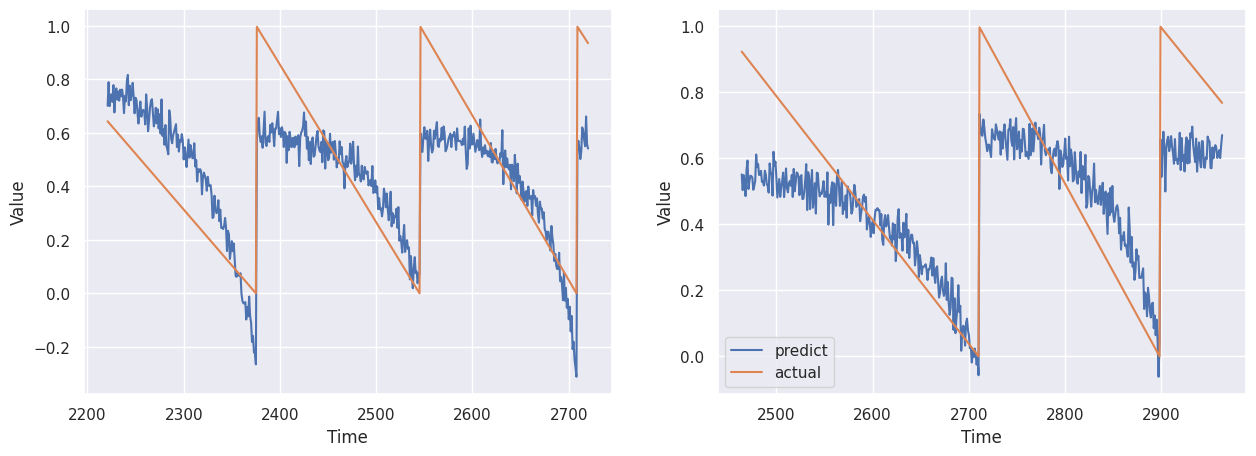

In [129]:
te.random_plot(500)

### Evaluate

In [130]:
teLR = test_evaluate(model_LR,X_test,y_test)

0.13218603538527643
      Predictions   Actuals     Error
0        0.382480  0.292174  0.090306
1        0.352885  0.288567  0.064318
2        0.410246  0.284960  0.125286
3        0.367372  0.281353  0.086019
4        0.416977  0.277746  0.139231
...           ...       ...       ...
3090     0.023528  0.020055  0.003472
3091     0.016036  0.015042  0.000995
3092    -0.036605  0.010028  0.046633
3093    -0.066704  0.005014  0.071718
3094    -0.035568  0.000000  0.035568

[3095 rows x 3 columns]


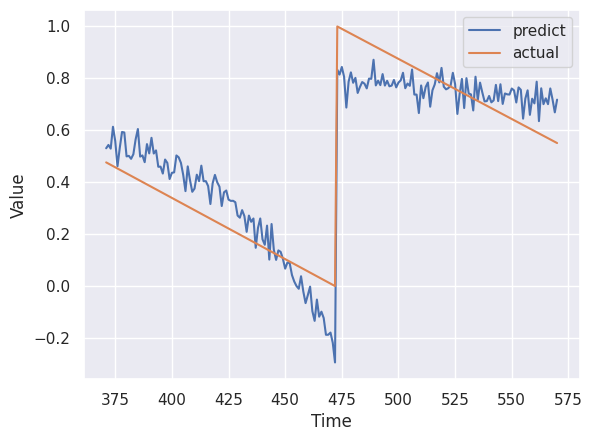

In [131]:
teLR.random_plot(200)

In [132]:
df_eva = teLR.record_test(df_eva,'LR')
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.132186  0.000021  0.536794  0.025267  0.132186  0.158956   

   R2_score  Run_time(s)  
0  0.702672     0.012413

In [133]:
# # make predictions on the testing data
# y_pred = model_LR.predict(X_test)

In [134]:
# from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
# # evaluate the performance of the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean squared error: {mse}")
# print(f"Root mean squared error: {rmse}")
# print(f"R-squared score: {r2}")
# print(f"mean_absolute_percentage_error: {mape}")

## Random forrest

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [135]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [136]:
history_RF = model_RF.fit(X_train, y_train)

In [137]:
te = training_error(history_RF,model_RF,X_train, y_train,X_val, y_val)

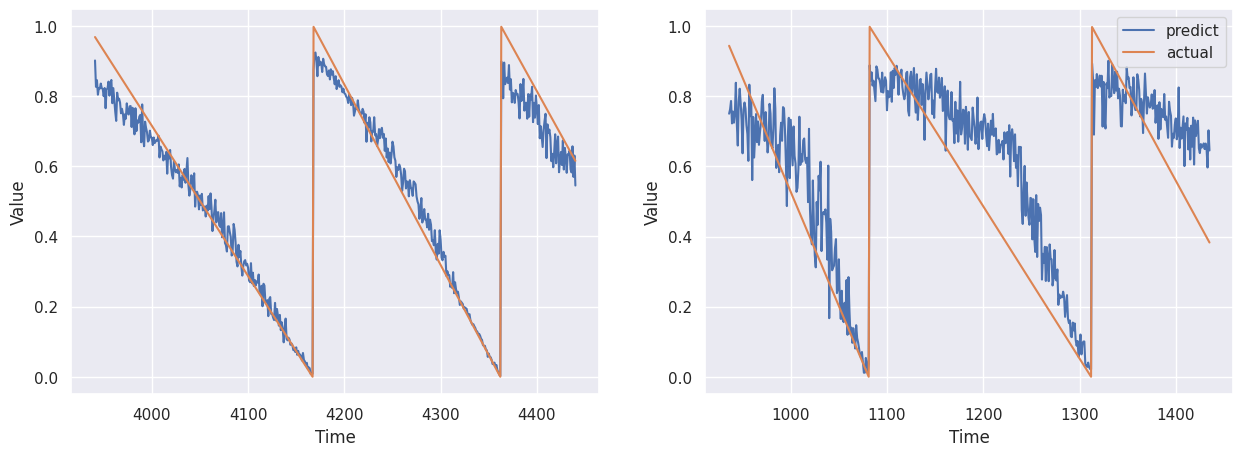

In [138]:
te.random_plot(500)

### Evaluate

In [139]:
teRF = test_evaluate(model_RF,X_test,y_test)

0.11440167221990843
      Predictions   Actuals     Error
0        0.317743  0.292174  0.025569
1        0.367717  0.288567  0.079150
2        0.439324  0.284960  0.154364
3        0.262576  0.281353  0.018777
4        0.341592  0.277746  0.063847
...           ...       ...       ...
3090     0.024496  0.020055  0.004441
3091     0.021944  0.015042  0.006902
3092     0.020997  0.010028  0.010970
3093     0.019381  0.005014  0.014367
3094     0.006850  0.000000  0.006850

[3095 rows x 3 columns]


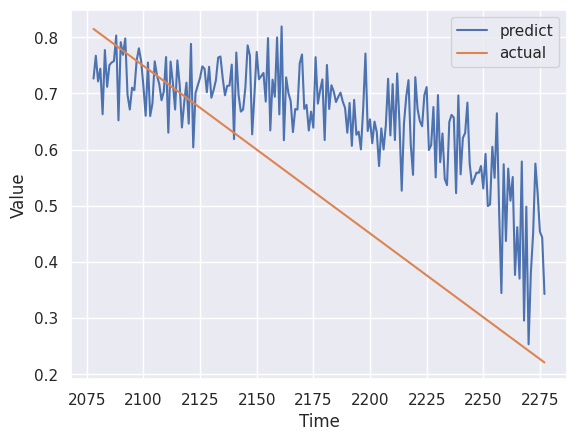

In [140]:
teRF.random_plot(200)

In [141]:
df_eva = teRF.record_test(df_eva,'RF')
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.132186  0.000021  0.536794  0.025267  0.132186  0.158956   
1         RF  0.114402  0.000096  0.537017  0.022866  0.114402  0.151215   

   R2_score  Run_time(s)  
0  0.702672     0.012413  
1  0.730927     0.141574

## GradientBoosting

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [143]:
history_GBR = model_GBR.fit(X_train, y_train)

In [144]:
te = training_error(history_GBR,model_GBR,X_train, y_train,X_val, y_val)

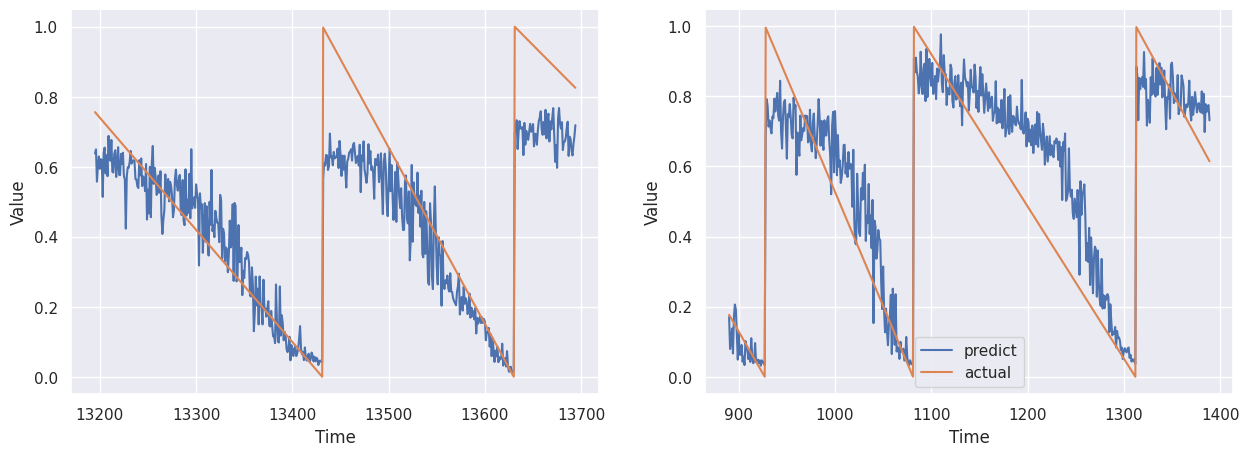

In [145]:
te.random_plot(500)

### Evaluate

In [146]:
teGBR = test_evaluate(model_GBR,X_test,y_test)

0.1123490831480961
      Predictions   Actuals     Error
0        0.245970  0.292174  0.046204
1        0.374629  0.288567  0.086062
2        0.397448  0.284960  0.112488
3        0.293034  0.281353  0.011681
4        0.383511  0.277746  0.105765
...           ...       ...       ...
3090     0.041597  0.020055  0.021542
3091     0.042847  0.015042  0.027806
3092     0.042930  0.010028  0.032902
3093     0.031778  0.005014  0.026765
3094     0.033150  0.000000  0.033150

[3095 rows x 3 columns]


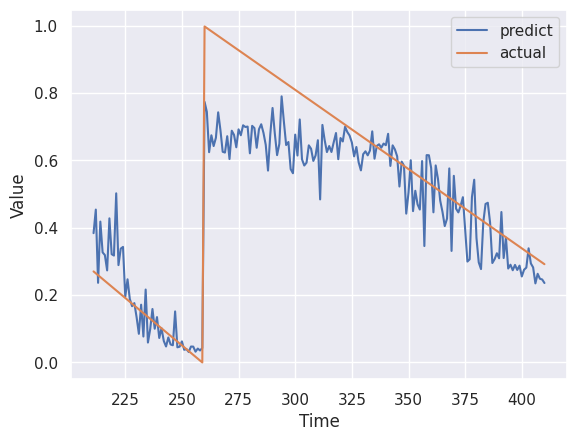

In [147]:
teGBR.random_plot(200)

In [148]:
df_eva = teGBR.record_test(df_eva,'GBR')
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.132186  0.000021  0.536794  0.025267  0.132186  0.158956   
1         RF  0.114402  0.000096  0.537017  0.022866  0.114402  0.151215   
2        GBR  0.112349  0.000054  0.492855  0.021843  0.112349  0.147795   

   R2_score  Run_time(s)  
0  0.702672     0.012413  
1  0.730927     0.141574  
2  0.742962     0.007623

## Dense

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [150]:
model_dense = Sequential()
model_dense.add(Dense(64, activation='relu', input_shape=(len(X_train.columns),)))
model_dense.add(Dense(64))
model_dense.add(Dropout(rate=0.3))
model_dense.add(Dense(1))

model_dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                960       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [151]:
MODEL_NAME = 'Dense'
SAVE_DENSE = mine_save_model(project_tag = CMAPSS_IN, MODEL_NAME = MODEL_NAME)

-Model will save as: 2023_06_20_Dense.h5
-Path to model: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/Dense/2023_06_20_Dense.h5


In [152]:
# Check point
cp = ModelCheckpoint(SAVE_DENSE, save_best_only=True)
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Compile model
model_dense.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [153]:
history_dense = model_dense.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[cp, early_stopping])

Epoch 1/1000
452/452 [==============================] - 2s 3ms/step - loss: 0.0995 - root_mean_squared_error: 0.3154 - val_loss: 0.0655 - val_root_mean_squared_error: 0.2560
Epoch 2/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2196
Epoch 3/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0566 - root_mean_squared_error: 0.2379 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1996
Epoch 4/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0509 - root_mean_squared_error: 0.2256 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1908
Epoch 5/1000
452/452 [==============================] - 2s 3ms/step - loss: 0.0466 - root_mean_squared_error: 0.2158 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1874
Epoch 6/1000
452/452 [==============================] - 1s 3ms/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - val_loss: 0

In [154]:
model_dense.save(SAVE_DENSE)

In [155]:
te = training_error(history_dense,model_dense,X_train,y_train,X_val,y_val)

97/97 [==============================] - 0s 1ms/step


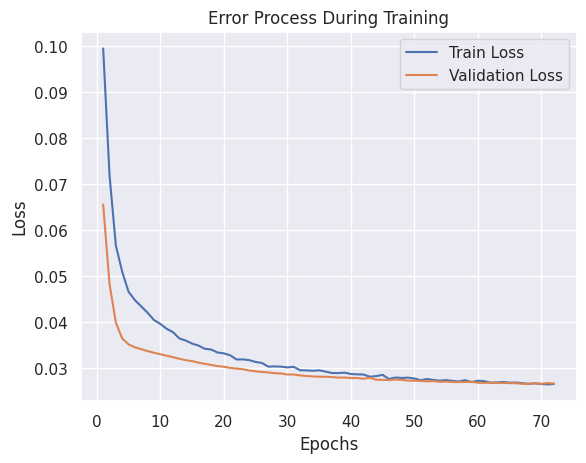

In [156]:
te.training_error()

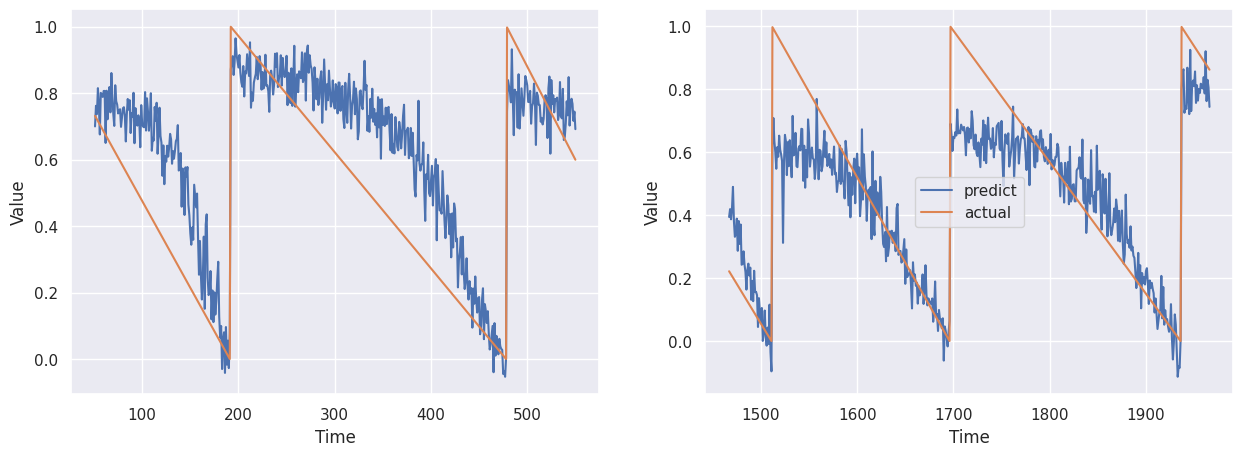

In [157]:
te.random_plot(500)

### Load

In [158]:
model_dense = mine_load_model(project_tag = CMAPSS_IN,MODEL_NAME = 'Dense')

number 0: 2023_06_20_Dense.h5
number 1: 2023_06_07_Dense.h5
number 2: 2023_06_06_Dense.h5
number 3: 2023_06_05_Dense.h5
number 4: 2023_06_02_Dense.h5
number 5: 2023_06_01_Dense.h5
-------> Model path choose: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/Dense/2023_06_20_Dense.h5


### Evaluate
Contains:
* Run predict on test set
* Record errors on a dataframe or further compair of difference models

In [159]:
teDense = test_evaluate(model_dense,X_test,y_test)

97/97 [==============================] - 0s 1ms/step
0.11808640778637819
      Predictions   Actuals     Error
0        0.343575  0.292174  0.051401
1        0.264482  0.288567  0.024084
2        0.413555  0.284960  0.128595
3        0.320756  0.281353  0.039403
4        0.395950  0.277746  0.118204
...           ...       ...       ...
3090     0.013913  0.020055  0.006143
3091    -0.124955  0.015042  0.139996
3092     0.050720  0.010028  0.040692
3093    -0.069298  0.005014  0.074312
3094    -0.095539  0.000000  0.095539

[3095 rows x 3 columns]


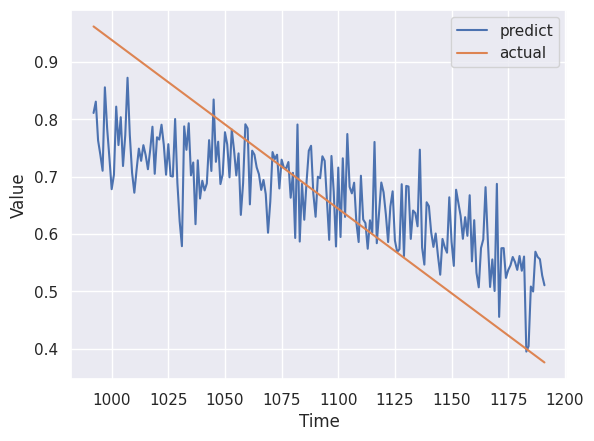

In [160]:
teDense.random_plot(200)

In [161]:
df_eva = teDense.record_test(df_eva,'Dense')
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.132186  0.000021  0.536794  0.025267  0.132186  0.158956   
1         RF  0.114402  0.000096  0.537017  0.022866  0.114402  0.151215   
2        GBR  0.112349  0.000054  0.492855  0.021843  0.112349  0.147795   
3      Dense  0.118086  0.000041  0.561824  0.022781  0.118086  0.150932   

   R2_score  Run_time(s)  
0  0.702672     0.012413  
1  0.730927     0.141574  
2  0.742962     0.007623  
3  0.731932     0.412528

## LSTM

### Define model

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [163]:
model_LSTM = Sequential()

model_LSTM.add(InputLayer((len(X_train.columns),1)))
model_LSTM.add(LSTM(units = 64,return_sequences=False))
model_LSTM.add(Dense(10, 'relu'))
model_LSTM.add(Dropout(rate=0.3))
model_LSTM.add(Flatten())
model_LSTM.add(Dense(1))

model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,557
Trainable params: 17,557
Non-trainable params: 0
_________________________________________________________________


In [164]:
MODEL_NAME = 'LSTM'
# Save folder
import time
current_time = time.strftime("%Y_%m_%d")
model_time_name = '%s_%s.h5'%(current_time,MODEL_NAME)
print(model_time_name)
SAVE_LSTM = os.path.join(CMAPSS_IN['SAVE_MODEL'],MODEL_NAME,model_time_name)
print(SAVE_LSTM)

2023_06_20_LSTM.h5
/content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/LSTM/2023_06_20_LSTM.h5


In [165]:
# Check point
cp = ModelCheckpoint(SAVE_LSTM, save_best_only=True)
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Complile
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

### Train

In [166]:
history_LSTM = model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp, early_stopping])

Epoch 1/100
452/452 [==============================] - 8s 13ms/step - loss: 0.2583 - root_mean_squared_error: 0.5082 - val_loss: 0.1977 - val_root_mean_squared_error: 0.4446
Epoch 2/100
452/452 [==============================] - 5s 12ms/step - loss: 0.1717 - root_mean_squared_error: 0.4144 - val_loss: 0.1284 - val_root_mean_squared_error: 0.3583
Epoch 3/100
452/452 [==============================] - 4s 9ms/step - loss: 0.1350 - root_mean_squared_error: 0.3674 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3149
Epoch 4/100
452/452 [==============================] - 5s 11ms/step - loss: 0.1249 - root_mean_squared_error: 0.3535 - val_loss: 0.0944 - val_root_mean_squared_error: 0.3073
Epoch 5/100
452/452 [==============================] - 5s 12ms/step - loss: 0.1251 - root_mean_squared_error: 0.3537 - val_loss: 0.0927 - val_root_mean_squared_error: 0.3045
Epoch 6/100
452/452 [==============================] - 4s 10ms/step - loss: 0.1194 - root_mean_squared_error: 0.3456 - val_loss: 0.

In [167]:
model_LSTM.save(SAVE_LSTM)

In [168]:
te = training_error(history_LSTM,model_LSTM,X_train,y_train,X_val,y_val)

97/97 [==============================] - 0s 4ms/step


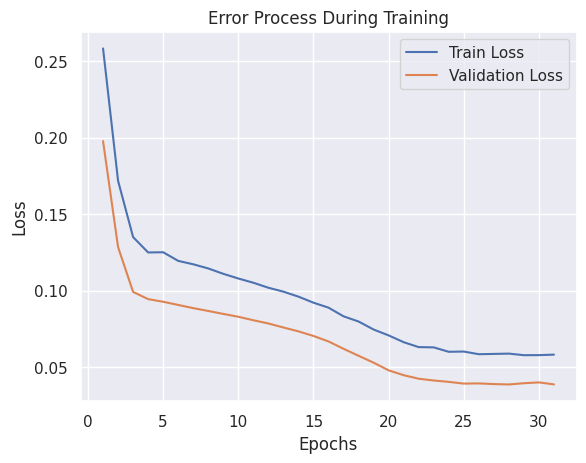

In [169]:
te.training_error()

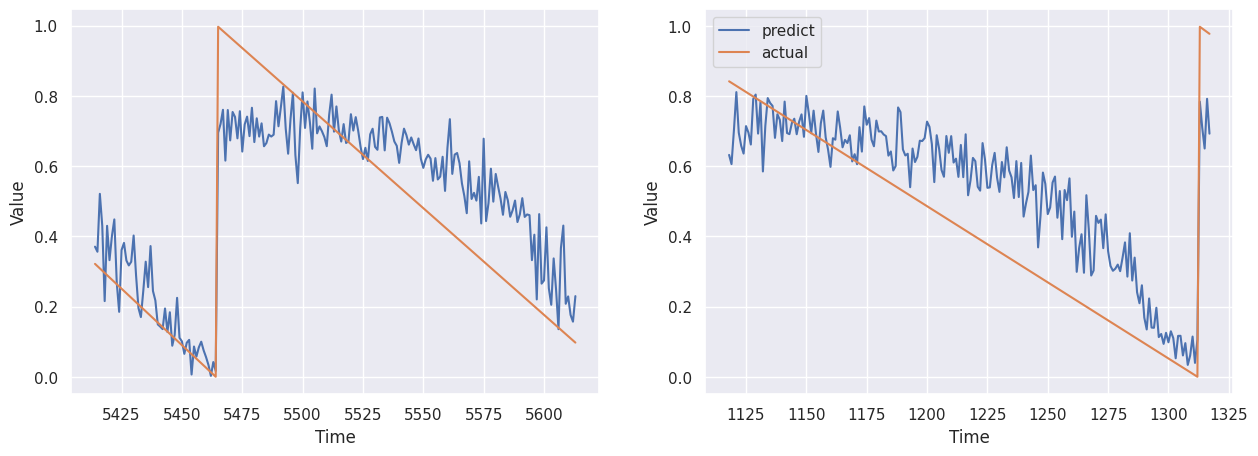

In [170]:
te.random_plot(200)

### Load

In [171]:
model_LSTM = mine_load_model(project_tag = CMAPSS_IN,MODEL_NAME = 'LSTM')

number 0: 2023_06_20_LSTM.h5
number 1: 2023_06_07_LSTM.h5
number 2: 2023_06_06_LSTM.h5
number 3: 2023_06_05_LSTM.h5
number 4: 2023_06_02_LSTM.h5
number 5: 2023_06_01_LSTM.h5
-------> Model path choose: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/LSTM/2023_06_20_LSTM.h5


### Evaluate

In [172]:
teLSTM = test_evaluate(model_LSTM,X_test,y_test)

97/97 [==============================] - 1s 6ms/step
0.1398738442907455
      Predictions   Actuals     Error
0        0.400661  0.292174  0.108487
1        0.452517  0.288567  0.163950
2        0.474517  0.284960  0.189558
3        0.241289  0.281353  0.040064
4        0.391176  0.277746  0.113430
...           ...       ...       ...
3090     0.110472  0.020055  0.090416
3091     0.101727  0.015042  0.086686
3092     0.068649  0.010028  0.058622
3093     0.075577  0.005014  0.070563
3094     0.077942  0.000000  0.077942

[3095 rows x 3 columns]


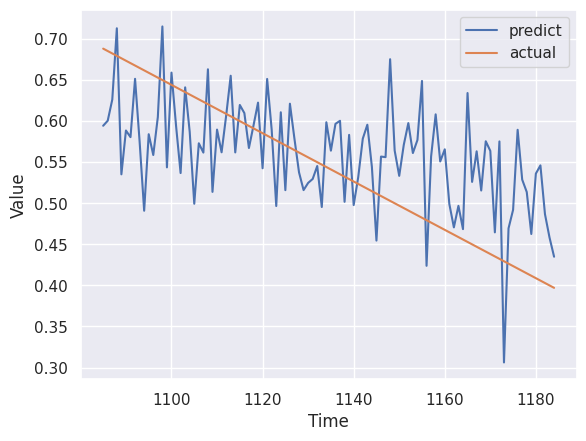

In [173]:
teLSTM.random_plot(100)

In [174]:
df_eva = teLSTM.record_test(df_eva,'LSTM')
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.132186  0.000021  0.536794  0.025267  0.132186  0.158956   
1         RF  0.114402  0.000096  0.537017  0.022866  0.114402  0.151215   
2        GBR  0.112349  0.000054  0.492855  0.021843  0.112349  0.147795   
3      Dense  0.118086  0.000041  0.561824  0.022781  0.118086  0.150932   
4       LSTM  0.139874  0.000027  0.690590  0.031027  0.139874  0.176145   

   R2_score  Run_time(s)  
0  0.702672     0.012413  
1  0.730927     0.141574  
2  0.742962     0.007623  
3  0.731932     0.412528  
4  0.634893     1.681946

## New model

### Define model

### Train

### Load

### Evaluate

# Conclusion review on models

Contains:
* All model errors compair
* Errors change from start to end of each model, cycles